# Homework 1-1

## 1-1 Training on a function

In [1]:
# Imports of Pytorch and matplotlib and other supporting modules
 
import math

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


### Utility functions

In [2]:
# Setting default device

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

display(f'{device} is available')

dtype = torch.float
torch.set_default_device(device)

def train_loop(dataloader, model, loss_fn, optimize, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    training_loss = 0
    num_batches = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        y_pred = y_pred.unsqueeze(1)
        loss = loss_fn(y_pred, y)
        training_loss+=loss.item()

        loss.backward()
        optimize.step()
        optimize.zero_grad()
  
    training_loss /= num_batches
    return training_loss

def val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            y_pred = model(X)
            y_pred = y_pred.unsqueeze(1)
            test_loss += loss_fn(y_pred, y).item()
            correct +=(y_pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

    #if epoch % 100 == 0:
    #    display(f"Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss

def cnt_model_params(model):
    """Count model parameters"""
    count = 0
    with torch.no_grad():
        for param in model.parameters():
            count+=param.numel()
    return count

def display_model_info(model_name, model):
    """ Display model information"""
    count = 0
    for module in model.modules():
        if isinstance(module, nn.Module):
            count+=1
    display(model)
    display(f"{model_name}. parameters: {cnt_model_params(model)}")

'cuda is available'

### Creating models

In [3]:
class CosNetwork(nn.Module):
        """First DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 128),
                nn.ReLU(),
                nn.Linear(128, 12),
                nn.ReLU(),
                nn.Linear(12, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              logits = self.linear_relu_stack(x)
              return logits
        
class CosNetwork2(nn.Module):
        """second DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 453),
                nn.ReLU(),
                nn.Linear(453, 2),
                nn.ReLU(),
                nn.Linear(2,1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              #x=self.flatten(x)
              logits = self.linear_relu_stack(x)
              return logits

class CosNetwork3(nn.Module):
        """Third DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 20),
                nn.ReLU(),
                nn.Linear(20, 20),
                nn.ReLU(),
                nn.Linear(20, 20),
                nn.ReLU(),
                nn.Linear(20, 14),
                nn.ReLU(),
                nn.Linear(14, 12),
                nn.ReLU(),
                nn.Linear(12, 10),
                nn.ReLU(),
                nn.Linear(10, 10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10, 9),
                nn.ReLU(),
                nn.Linear(9, 1),
                nn.ReLU(),
                nn.Linear(1,1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              logits = self.linear_relu_stack(x)
              return logits
        

cos_model1, cos_model2, cos_model3 = CosNetwork(), CosNetwork2(), CosNetwork3()

display_model_info("cos_model1", cos_model1)
display_model_info("cos_model2", cos_model2)
display_model_info("cos_model3", cos_model3)


CosNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=1, bias=True)
    (5): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model1. parameters: 1817'

CosNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=453, bias=True)
    (1): ReLU()
    (2): Linear(in_features=453, out_features=2, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=1, bias=True)
    (5): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model2. parameters: 1817'

CosNetwork3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=14, bias=True)
    (7): ReLU()
    (8): Linear(in_features=14, out_features=12, bias=True)
    (9): ReLU()
    (10): Linear(in_features=12, out_features=10, bias=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): ReLU()
    (16): Linear(in_features=10, out_features=9, bias=True)
    (17): ReLU()
    (18): Linear(in_features=9, out_features=1, bias=True)
    (19): ReLU()
    (20): Linear(in_features=1, out_features=1, bias=True)
    (21): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model3. parameters: 1815'

### Training & Testing Loop

In [4]:
x, x2 = torch.utils.data.random_split(torch.linspace(-math.pi, math.pi, 20000, dtype=dtype), [16000, 4000], generator=torch.Generator(device=torch.device('cuda')).manual_seed(42))
x, x2 = torch.Tensor([b for idx, b in enumerate(x.dataset) if idx in x.indices]).to(device), torch.Tensor([c for idx, c in enumerate(x2.dataset) if idx in x2.indices]).to(device)
# torch.linspace(-math.pi, math.pi, 10000, dtype=dtype)
y = torch.cos(x)
y2 = torch.cos(x2)

lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()

loss_fn = torch.nn.MSELoss()
epochs = 5000
lr = 1e-3
batch_size=8000
optimizer1 = torch.optim.SGD(cos_model1.parameters(), lr=lr)
train_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
#val_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
val_dataloader = DataLoader(TensorDataset(x2.unsqueeze(1),y2.unsqueeze(1)), batch_size=batch_size)
patience = 20
best_val_loss = float('inf')
epochs_without_improvement = 0

display("Training & eval: cos1 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model1, loss_fn, optimizer1, epoch)
    val_loss = val_loop(val_dataloader, cos_model1, loss_fn, epoch)

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx1.append(epoch)
        lossy1.append(test_loss)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx1.append(epoch)
            lossy1.append(test_loss)
        break
display("Done")

optimizer2 = torch.optim.SGD(cos_model2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos2 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model2, loss_fn, optimizer2, epoch)
    val_loss = val_loop(val_dataloader, cos_model2, loss_fn, epoch)

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx2.append(epoch)
        lossy2.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx2.append(epoch)
            lossy2.append(test_loss)
        break
display("Done")

optimizer3 = torch.optim.SGD(cos_model3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos3 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model3, loss_fn, optimizer3, epoch)
    val_loss = val_loop(val_dataloader, cos_model3, loss_fn, epoch)

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx3.append(epoch)
        lossy3.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx3.append(epoch)
            lossy3.append(test_loss)
        break
display("Done")

'Training & eval: cos1 model'

'Epoch 0. Train loss: 0.5353140234947205. Test loss: 0.5384336113929749.'

'Epoch 10. Train loss: 0.46466264128685. Test loss: 0.4646517038345337.'

'Epoch 20. Train loss: 0.42637211084365845. Test loss: 0.4248899519443512.'

'Epoch 30. Train loss: 0.40443255007267. Test loss: 0.4013795554637909.'

'Epoch 40. Train loss: 0.38802608847618103. Test loss: 0.3836910128593445.'

'Epoch 50. Train loss: 0.37470827996730804. Test loss: 0.36935871839523315.'

'Epoch 60. Train loss: 0.36334986984729767. Test loss: 0.3572116196155548.'

'Epoch 70. Train loss: 0.35327422618865967. Test loss: 0.3465288579463959.'

'Epoch 80. Train loss: 0.3440514951944351. Test loss: 0.3368447422981262.'

'Epoch 90. Train loss: 0.33540986478328705. Test loss: 0.3278604745864868.'

'Epoch 100. Train loss: 0.3271847665309906. Test loss: 0.31938672065734863.'

'Epoch 110. Train loss: 0.319272056221962. Test loss: 0.31129828095436096.'

'Epoch 120. Train loss: 0.3116041421890259. Test loss: 0.3035125732421875.'

'Epoch 130. Train loss: 0.3041384667158127. Test loss: 0.2959716320037842.'

'Epoch 140. Train loss: 0.2968441843986511. Test loss: 0.2886411249637604.'

'Epoch 150. Train loss: 0.2897031009197235. Test loss: 0.28149014711380005.'

'Epoch 160. Train loss: 0.28270234167575836. Test loss: 0.2744975984096527.'

'Epoch 170. Train loss: 0.2758306860923767. Test loss: 0.26764971017837524.'

'Epoch 180. Train loss: 0.26907671242952347. Test loss: 0.26093587279319763.'

'Epoch 190. Train loss: 0.2624288350343704. Test loss: 0.2543518841266632.'

'Epoch 200. Train loss: 0.2558854892849922. Test loss: 0.24788551032543182.'

'Epoch 210. Train loss: 0.24944422394037247. Test loss: 0.24153108894824982.'

'Epoch 220. Train loss: 0.24310272186994553. Test loss: 0.23528358340263367.'

'Epoch 230. Train loss: 0.23685862123966217. Test loss: 0.22913886606693268.'

'Epoch 240. Train loss: 0.23071050643920898. Test loss: 0.2230951488018036.'

'Epoch 250. Train loss: 0.22465650737285614. Test loss: 0.2171512395143509.'

'Epoch 260. Train loss: 0.21869435161352158. Test loss: 0.2113034725189209.'

'Epoch 270. Train loss: 0.21282200515270233. Test loss: 0.20555035769939423.'

'Epoch 280. Train loss: 0.2070385441184044. Test loss: 0.19989106059074402.'

'Epoch 290. Train loss: 0.2013438418507576. Test loss: 0.1943245679140091.'

'Epoch 300. Train loss: 0.19573697447776794. Test loss: 0.1888495832681656.'

'Epoch 310. Train loss: 0.19021812081336975. Test loss: 0.18346485495567322.'

'Epoch 320. Train loss: 0.18478597700595856. Test loss: 0.17816895246505737.'

'Epoch 330. Train loss: 0.17944039404392242. Test loss: 0.17296069860458374.'

'Epoch 340. Train loss: 0.17418017983436584. Test loss: 0.1678375005722046.'

'Epoch 350. Train loss: 0.16900338232517242. Test loss: 0.16279926896095276.'

'Epoch 360. Train loss: 0.16402968764305115. Test loss: 0.15796500444412231.'

'Epoch 370. Train loss: 0.15926172584295273. Test loss: 0.1533210277557373.'

'Epoch 380. Train loss: 0.15462148189544678. Test loss: 0.14880241453647614.'

'Epoch 390. Train loss: 0.15009726583957672. Test loss: 0.14440026879310608.'

'Epoch 400. Train loss: 0.14567869901657104. Test loss: 0.14010700583457947.'

'Epoch 410. Train loss: 0.14135318994522095. Test loss: 0.1359158605337143.'

'Epoch 420. Train loss: 0.1371133029460907. Test loss: 0.13181357085704803.'

'Epoch 430. Train loss: 0.13295472785830498. Test loss: 0.12778928875923157.'

'Epoch 440. Train loss: 0.12887131422758102. Test loss: 0.12383928149938583.'

'Epoch 450. Train loss: 0.12484286352992058. Test loss: 0.11994511634111404.'

'Epoch 460. Train loss: 0.12086111307144165. Test loss: 0.11610067635774612.'

'Epoch 470. Train loss: 0.1168673038482666. Test loss: 0.1122409999370575.'

'Epoch 480. Train loss: 0.11287977918982506. Test loss: 0.10841243714094162.'

'Epoch 490. Train loss: 0.10909141227602959. Test loss: 0.104778952896595.'

'Epoch 500. Train loss: 0.10550538450479507. Test loss: 0.10133791714906693.'

'Epoch 510. Train loss: 0.10208620503544807. Test loss: 0.09805068373680115.'

'Epoch 520. Train loss: 0.09878923743963242. Test loss: 0.09487592428922653.'

'Epoch 530. Train loss: 0.09559077396988869. Test loss: 0.09179524332284927.'

'Epoch 540. Train loss: 0.09247707575559616. Test loss: 0.08879776298999786.'

'Epoch 550. Train loss: 0.08944408595561981. Test loss: 0.08587934076786041.'

'Epoch 560. Train loss: 0.08648985996842384. Test loss: 0.08303943276405334.'

'Epoch 570. Train loss: 0.08361366018652916. Test loss: 0.08027574419975281.'

'Epoch 580. Train loss: 0.08081367611885071. Test loss: 0.07758775353431702.'

'Epoch 590. Train loss: 0.07808922603726387. Test loss: 0.07497314363718033.'

'Epoch 600. Train loss: 0.07543915137648582. Test loss: 0.07243063300848007.'

'Epoch 610. Train loss: 0.07286197692155838. Test loss: 0.06995905935764313.'

'Epoch 620. Train loss: 0.07035700976848602. Test loss: 0.06755656749010086.'

'Epoch 630. Train loss: 0.06792286224663258. Test loss: 0.06522218883037567.'

'Epoch 640. Train loss: 0.06555848196148872. Test loss: 0.06295458972454071.'

'Epoch 650. Train loss: 0.06326230056583881. Test loss: 0.060753557831048965.'

'Epoch 660. Train loss: 0.061033183708786964. Test loss: 0.05861770361661911.'

'Epoch 670. Train loss: 0.058870235458016396. Test loss: 0.056545648723840714.'

'Epoch 680. Train loss: 0.05677209421992302. Test loss: 0.05453672260046005.'

'Epoch 690. Train loss: 0.05473773926496506. Test loss: 0.05258968472480774.'

'Epoch 700. Train loss: 0.052765944972634315. Test loss: 0.05070377513766289.'

'Epoch 710. Train loss: 0.05085564963519573. Test loss: 0.04887764900922775.'

'Epoch 720. Train loss: 0.04900592938065529. Test loss: 0.047109879553318024.'

'Epoch 730. Train loss: 0.047215767204761505. Test loss: 0.04539930447936058.'

'Epoch 740. Train loss: 0.04548400640487671. Test loss: 0.04374482110142708.'

'Epoch 750. Train loss: 0.04380954056978226. Test loss: 0.04214547947049141.'

'Epoch 760. Train loss: 0.04219122976064682. Test loss: 0.040600117295980453.'

'Epoch 770. Train loss: 0.040627799928188324. Test loss: 0.039107974618673325.'

'Epoch 780. Train loss: 0.03911819867789745. Test loss: 0.03766773268580437.'

'Epoch 790. Train loss: 0.03766132891178131. Test loss: 0.036278314888477325.'

'Epoch 800. Train loss: 0.03625597059726715. Test loss: 0.03493865579366684.'

'Epoch 810. Train loss: 0.03490112069994211. Test loss: 0.033647410571575165.'

'Epoch 820. Train loss: 0.03359563276171684. Test loss: 0.032403405755758286.'

'Epoch 830. Train loss: 0.032338401302695274. Test loss: 0.031205641105771065.'

'Epoch 840. Train loss: 0.031128169037401676. Test loss: 0.03005291149020195.'

'Epoch 850. Train loss: 0.02996381465345621. Test loss: 0.028944192454218864.'

'Epoch 860. Train loss: 0.028844213113188744. Test loss: 0.027878282591700554.'

'Epoch 870. Train loss: 0.027768149971961975. Test loss: 0.02685413509607315.'

'Epoch 880. Train loss: 0.026734475046396255. Test loss: 0.025870628654956818.'

'Epoch 890. Train loss: 0.025742010213434696. Test loss: 0.02492661587893963.'

'Epoch 900. Train loss: 0.024789640679955482. Test loss: 0.024020984768867493.'

'Epoch 910. Train loss: 0.02387617714703083. Test loss: 0.023152632638812065.'

'Epoch 920. Train loss: 0.023000475019216537. Test loss: 0.022320475429296494.'

'Epoch 930. Train loss: 0.022161408327519894. Test loss: 0.02152334712445736.'

'Epoch 940. Train loss: 0.021357840858399868. Test loss: 0.02076016739010811.'

'Epoch 950. Train loss: 0.020588642917573452. Test loss: 0.02002982422709465.'

'Epoch 960. Train loss: 0.01985271740704775. Test loss: 0.01933126337826252.'

'Epoch 970. Train loss: 0.019148937426507473. Test loss: 0.018663402646780014.'

'Epoch 980. Train loss: 0.018476225435733795. Test loss: 0.018025223165750504.'

'Epoch 990. Train loss: 0.01783348899334669. Test loss: 0.017415711656212807.'

'Epoch 1000. Train loss: 0.017219647765159607. Test loss: 0.01683383248746395.'

'Epoch 1010. Train loss: 0.016633644700050354. Test loss: 0.016278576105833054.'

'Epoch 1020. Train loss: 0.016074461862444878. Test loss: 0.01574900560081005.'

'Epoch 1030. Train loss: 0.015541116241365671. Test loss: 0.015244103036820889.'

'Epoch 1040. Train loss: 0.01503260713070631. Test loss: 0.014762906357645988.'

'Epoch 1050. Train loss: 0.014547961764037609. Test loss: 0.014304476790130138.'

'Epoch 1060. Train loss: 0.014086250215768814. Test loss: 0.013867945410311222.'

'Epoch 1070. Train loss: 0.01364652905613184. Test loss: 0.013452398590743542.'

'Epoch 1080. Train loss: 0.013227886985987425. Test loss: 0.01305693481117487.'

'Epoch 1090. Train loss: 0.01282947976142168. Test loss: 0.012680722400546074.'

'Epoch 1100. Train loss: 0.012450433801859617. Test loss: 0.012322947382926941.'

'Epoch 1110. Train loss: 0.01208990952000022. Test loss: 0.011982782743871212.'

'Epoch 1120. Train loss: 0.011747096665203571. Test loss: 0.011659474112093449.'

'Epoch 1130. Train loss: 0.011421206872910261. Test loss: 0.011352299712598324.'

'Epoch 1140. Train loss: 0.011111469008028507. Test loss: 0.011060518212616444.'

'Epoch 1150. Train loss: 0.010817164089530706. Test loss: 0.010783393867313862.'

'Epoch 1160. Train loss: 0.010537591762840748. Test loss: 0.01052023097872734.'

'Epoch 1170. Train loss: 0.01027207262814045. Test loss: 0.01027039997279644.'

'Epoch 1180. Train loss: 0.010019915644079447. Test loss: 0.010033237747848034.'

'Epoch 1190. Train loss: 0.009780478198081255. Test loss: 0.009808141738176346.'

'Epoch 1200. Train loss: 0.009553122334182262. Test loss: 0.009594460017979145.'

'Epoch 1210. Train loss: 0.009337184019386768. Test loss: 0.00939155649393797.'

'Epoch 1220. Train loss: 0.009131893049925566. Test loss: 0.00919876154512167.'

'Epoch 1230. Train loss: 0.008936356054618955. Test loss: 0.00901519600301981.'

'Epoch 1240. Train loss: 0.008749493164941669. Test loss: 0.00883947592228651.'

'Epoch 1250. Train loss: 0.008570120669901371. Test loss: 0.008669514209032059.'

'Epoch 1260. Train loss: 0.0083965880330652. Test loss: 0.00850340723991394.'

'Epoch 1270. Train loss: 0.008226805599406362. Test loss: 0.008339189924299717.'

'Epoch 1280. Train loss: 0.008058783831074834. Test loss: 0.008175106719136238.'

'Epoch 1290. Train loss: 0.007891526212915778. Test loss: 0.008010348305106163.'

'Epoch 1300. Train loss: 0.007725798524916172. Test loss: 0.007846610620617867.'

'Epoch 1310. Train loss: 0.0075638338457793. Test loss: 0.007686456199735403.'

'Epoch 1320. Train loss: 0.00740846386179328. Test loss: 0.007533330004662275.'

'Epoch 1330. Train loss: 0.007261605700477958. Test loss: 0.007389433216303587.'

'Epoch 1340. Train loss: 0.007124030496925116. Test loss: 0.00725534139201045.'

'Epoch 1350. Train loss: 0.006995702628046274. Test loss: 0.007130973041057587.'

'Epoch 1360. Train loss: 0.0068759911227971315. Test loss: 0.007015511859208345.'

'Epoch 1370. Train loss: 0.006763976998627186. Test loss: 0.006908053997904062.'

'Epoch 1380. Train loss: 0.006658976664766669. Test loss: 0.0068075042217969894.'

'Epoch 1390. Train loss: 0.006560279056429863. Test loss: 0.006713172420859337.'

'Epoch 1400. Train loss: 0.006467186147347093. Test loss: 0.0066245244815945625.'

'Epoch 1410. Train loss: 0.006379258818924427. Test loss: 0.00654086796566844.'

'Epoch 1420. Train loss: 0.006296016974374652. Test loss: 0.006461904849857092.'

'Epoch 1430. Train loss: 0.006217116955667734. Test loss: 0.006387143861502409.'

'Epoch 1440. Train loss: 0.006142313592135906. Test loss: 0.006316210143268108.'

'Epoch 1450. Train loss: 0.006071292795240879. Test loss: 0.006248805206269026.'

'Epoch 1460. Train loss: 0.00600376701913774. Test loss: 0.006184747442603111.'

'Epoch 1470. Train loss: 0.005939544178545475. Test loss: 0.006123751401901245.'

'Epoch 1480. Train loss: 0.005878444062545896. Test loss: 0.006065616849809885.'

'Epoch 1490. Train loss: 0.005820245249196887. Test loss: 0.006010175682604313.'

'Epoch 1500. Train loss: 0.005764742847532034. Test loss: 0.005957284476608038.'

'Epoch 1510. Train loss: 0.005711781792342663. Test loss: 0.005906815640628338.'

'Epoch 1520. Train loss: 0.005661204224452376. Test loss: 0.005858628544956446.'

'Epoch 1530. Train loss: 0.0056128844153136015. Test loss: 0.0058125825598835945.'

'Epoch 1540. Train loss: 0.005566701292991638. Test loss: 0.0057685477659106255.'

'Epoch 1550. Train loss: 0.005522547056898475. Test loss: 0.005726390052586794.'

'Epoch 1560. Train loss: 0.005480293417349458. Test loss: 0.005686032585799694.'

'Epoch 1570. Train loss: 0.005439835600554943. Test loss: 0.005647363141179085.'

'Epoch 1580. Train loss: 0.005401071393862367. Test loss: 0.005610286723822355.'

'Epoch 1590. Train loss: 0.005363892065361142. Test loss: 0.005574712995439768.'

'Epoch 1600. Train loss: 0.005328237311914563. Test loss: 0.00554056279361248.'

'Epoch 1610. Train loss: 0.005294015863910317. Test loss: 0.005507750902324915.'

'Epoch 1620. Train loss: 0.005261140875518322. Test loss: 0.0054762098006904125.'

'Epoch 1630. Train loss: 0.0052295473869889975. Test loss: 0.005445868708193302.'

'Epoch 1640. Train loss: 0.0051991683430969715. Test loss: 0.005416659638285637.'

'Epoch 1650. Train loss: 0.005169934127479792. Test loss: 0.005388518795371056.'

'Epoch 1660. Train loss: 0.005141785833984613. Test loss: 0.005361388437449932.'

'Epoch 1670. Train loss: 0.005114649655297399. Test loss: 0.005335226189345121.'

'Epoch 1680. Train loss: 0.0050884869415313005. Test loss: 0.005309972912073135.'

'Epoch 1690. Train loss: 0.005063238553702831. Test loss: 0.005285582970827818.'

'Epoch 1700. Train loss: 0.005038861418142915. Test loss: 0.005262007936835289.'

'Epoch 1710. Train loss: 0.00501531339250505. Test loss: 0.005239204503595829.'

'Epoch 1720. Train loss: 0.004992557689547539. Test loss: 0.005217127501964569.'

'Epoch 1730. Train loss: 0.004970543086528778. Test loss: 0.005195735953748226.'

'Epoch 1740. Train loss: 0.0049492300022393465. Test loss: 0.005174999590963125.'

'Epoch 1750. Train loss: 0.004928590497002006. Test loss: 0.005154888611286879.'

'Epoch 1760. Train loss: 0.004908581962808967. Test loss: 0.005135366227477789.'

'Epoch 1770. Train loss: 0.0048891708720475435. Test loss: 0.005116407759487629.'

'Epoch 1780. Train loss: 0.004870341159403324. Test loss: 0.005097977817058563.'

'Epoch 1790. Train loss: 0.004852057434618473. Test loss: 0.0050800517201423645.'

'Epoch 1800. Train loss: 0.004834296647459269. Test loss: 0.0050626033917069435.'

'Epoch 1810. Train loss: 0.00481703074183315. Test loss: 0.005045609548687935.'

'Epoch 1820. Train loss: 0.004800235386937857. Test loss: 0.00502904923632741.'

'Epoch 1830. Train loss: 0.004783880780451. Test loss: 0.00501289963722229.'

'Epoch 1840. Train loss: 0.004767951904796064. Test loss: 0.004997142590582371.'

'Epoch 1850. Train loss: 0.004752433975227177. Test loss: 0.004981760401278734.'

'Epoch 1860. Train loss: 0.004737302544526756. Test loss: 0.004966735374182463.'

'Epoch 1870. Train loss: 0.004722541896626353. Test loss: 0.004952054005116224.'

'Epoch 1880. Train loss: 0.004708133288659155. Test loss: 0.004937697667628527.'

'Epoch 1890. Train loss: 0.004694058676250279. Test loss: 0.004923656582832336.'

'Epoch 1900. Train loss: 0.004680302110500634. Test loss: 0.00490991584956646.'

'Epoch 1910. Train loss: 0.004666848108172417. Test loss: 0.0048964605666697025.'

'Epoch 1920. Train loss: 0.004653690033592284. Test loss: 0.004883284214884043.'

'Epoch 1930. Train loss: 0.004640809493139386. Test loss: 0.004870368633419275.'

'Epoch 1940. Train loss: 0.004628195660188794. Test loss: 0.004857705440372229.'

'Epoch 1950. Train loss: 0.0046158392215147614. Test loss: 0.0048452806659042835.'

'Epoch 1960. Train loss: 0.004603730398230255. Test loss: 0.00483308732509613.'

'Epoch 1970. Train loss: 0.004591858945786953. Test loss: 0.004821109585464001.'

'Epoch 1980. Train loss: 0.00458021298982203. Test loss: 0.004809343721717596.'

'Epoch 1990. Train loss: 0.0045687847305089235. Test loss: 0.004797776695340872.'

'Epoch 2000. Train loss: 0.004557563923299313. Test loss: 0.004786411300301552.'

'Epoch 2010. Train loss: 0.004546544281765819. Test loss: 0.004775234032422304.'

'Epoch 2020. Train loss: 0.004535720567218959. Test loss: 0.004764234647154808.'

'Epoch 2030. Train loss: 0.0045250809052959085. Test loss: 0.004753411747515202.'

'Epoch 2040. Train loss: 0.004514620522968471. Test loss: 0.004742756485939026.'

'Epoch 2050. Train loss: 0.004504334880039096. Test loss: 0.00473226560279727.'

'Epoch 2060. Train loss: 0.004494213848374784. Test loss: 0.0047219316475093365.'

'Epoch 2070. Train loss: 0.004484252887777984. Test loss: 0.004711746238172054.'

'Epoch 2080. Train loss: 0.004474447574466467. Test loss: 0.004701710306107998.'

'Epoch 2090. Train loss: 0.00446479010861367. Test loss: 0.004691816866397858.'

'Epoch 2100. Train loss: 0.004455279093235731. Test loss: 0.004682060331106186.'

'Epoch 2110. Train loss: 0.004445906030014157. Test loss: 0.004672439768910408.'

'Epoch 2120. Train loss: 0.004436670569702983. Test loss: 0.00466294726356864.'

'Epoch 2130. Train loss: 0.004427566775120795. Test loss: 0.004653575364500284.'

'Epoch 2140. Train loss: 0.00441858870908618. Test loss: 0.004644325003027916.'

'Epoch 2150. Train loss: 0.004409732413478196. Test loss: 0.004635189659893513.'

'Epoch 2160. Train loss: 0.004400995443575084. Test loss: 0.004626168869435787.'

'Epoch 2170. Train loss: 0.004392375471070409. Test loss: 0.004617256578058004.'

'Epoch 2180. Train loss: 0.004383867490105331. Test loss: 0.004608454182744026.'

'Epoch 2190. Train loss: 0.0043754661455750465. Test loss: 0.004599753767251968.'

'Epoch 2200. Train loss: 0.004367172601632774. Test loss: 0.004591155797243118.'

'Epoch 2210. Train loss: 0.004358983016572893. Test loss: 0.004582653287798166.'

'Epoch 2220. Train loss: 0.004350893315859139. Test loss: 0.004574247635900974.'

'Epoch 2230. Train loss: 0.004342899075709283. Test loss: 0.00456593232229352.'

'Epoch 2240. Train loss: 0.00433499994687736. Test loss: 0.004557713400572538.'

'Epoch 2250. Train loss: 0.004327192320488393. Test loss: 0.004549582488834858.'

'Epoch 2260. Train loss: 0.004319476429373026. Test loss: 0.004541538655757904.'

'Epoch 2270. Train loss: 0.00431184668559581. Test loss: 0.004533579107373953.'

'Epoch 2280. Train loss: 0.004304302739910781. Test loss: 0.004525704775005579.'

'Epoch 2290. Train loss: 0.0042968434281647205. Test loss: 0.004517906811088324.'

'Epoch 2300. Train loss: 0.0042894629295915365. Test loss: 0.0045101880095899105.'

'Epoch 2310. Train loss: 0.0042821611277759075. Test loss: 0.0045025465078651905.'

'Epoch 2320. Train loss: 0.00427493778988719. Test loss: 0.004494978114962578.'

'Epoch 2330. Train loss: 0.004267789074219763. Test loss: 0.004487487953156233.'

'Epoch 2340. Train loss: 0.004260715330019593. Test loss: 0.004480068571865559.'

'Epoch 2350. Train loss: 0.00425371341407299. Test loss: 0.004472723230719566.'

'Epoch 2360. Train loss: 0.004246780415996909. Test loss: 0.004465446807444096.'

'Epoch 2370. Train loss: 0.004239915404468775. Test loss: 0.004458240699023008.'

'Epoch 2380. Train loss: 0.004233117564581335. Test loss: 0.004451103508472443.'

'Epoch 2390. Train loss: 0.004226386430673301. Test loss: 0.004444032441824675.'

'Epoch 2400. Train loss: 0.004219718393869698. Test loss: 0.004437028430402279.'

'Epoch 2410. Train loss: 0.004213112057186663. Test loss: 0.004430086817592382.'

'Epoch 2420. Train loss: 0.004206571145914495. Test loss: 0.004423206672072411.'

'Epoch 2430. Train loss: 0.0042000871617347. Test loss: 0.004416383802890778.'

'Epoch 2440. Train loss: 0.00419366464484483. Test loss: 0.0044096228666603565.'

'Epoch 2450. Train loss: 0.0041872968431562185. Test loss: 0.004402920138090849.'

'Epoch 2460. Train loss: 0.004180987598374486. Test loss: 0.00439627468585968.'

'Epoch 2470. Train loss: 0.004174733534455299. Test loss: 0.004389688838273287.'

'Epoch 2480. Train loss: 0.004168535815551877. Test loss: 0.004383157007396221.'

'Epoch 2490. Train loss: 0.0041623900178819895. Test loss: 0.004376680590212345.'

'Epoch 2500. Train loss: 0.004156298818998039. Test loss: 0.004370260518044233.'

'Epoch 2510. Train loss: 0.004150258959271014. Test loss: 0.004363893531262875.'

'Epoch 2520. Train loss: 0.004144268692471087. Test loss: 0.004357576835900545.'

'Epoch 2530. Train loss: 0.004138328251428902. Test loss: 0.004351308103650808.'

'Epoch 2540. Train loss: 0.004132437519729137. Test loss: 0.004345094785094261.'

'Epoch 2550. Train loss: 0.00412659312132746. Test loss: 0.004338928498327732.'

'Epoch 2560. Train loss: 0.00412079703528434. Test loss: 0.004332809243351221.'

'Epoch 2570. Train loss: 0.00411505124066025. Test loss: 0.004326739348471165.'

'Epoch 2580. Train loss: 0.0041093474719673395. Test loss: 0.004320711363106966.'

'Epoch 2590. Train loss: 0.0041036930633708835. Test loss: 0.004314733203500509.'

'Epoch 2600. Train loss: 0.004098081379197538. Test loss: 0.00430879695340991.'

'Epoch 2610. Train loss: 0.00409251288510859. Test loss: 0.004302909132093191.'

'Epoch 2620. Train loss: 0.004086988512426615. Test loss: 0.004297065082937479.'

'Epoch 2630. Train loss: 0.004081507329829037. Test loss: 0.004291259218007326.'

'Epoch 2640. Train loss: 0.004076066426932812. Test loss: 0.004285499919205904.'

'Epoch 2650. Train loss: 0.0040706697618588805. Test loss: 0.004279783461242914.'

'Epoch 2660. Train loss: 0.0040653119795024395. Test loss: 0.0042741065844893456.'

'Epoch 2670. Train loss: 0.004059993661940098. Test loss: 0.004268469754606485.'

'Epoch 2680. Train loss: 0.004054714576341212. Test loss: 0.004262872971594334.'

'Epoch 2690. Train loss: 0.004049475304782391. Test loss: 0.004257316701114178.'

'Epoch 2700. Train loss: 0.004044272820465267. Test loss: 0.004251797683537006.'

'Epoch 2710. Train loss: 0.004039107821881771. Test loss: 0.004246319178491831.'

'Epoch 2720. Train loss: 0.004033981007523835. Test loss: 0.004240883514285088.'

'Epoch 2730. Train loss: 0.004028891213238239. Test loss: 0.004235479515045881.'

'Epoch 2740. Train loss: 0.004023838089779019. Test loss: 0.004230112303048372.'

'Epoch 2750. Train loss: 0.004018820356577635. Test loss: 0.004224784206598997.'

'Epoch 2760. Train loss: 0.004013839410617948. Test loss: 0.004219494294375181.'

'Epoch 2770. Train loss: 0.004008889896795154. Test loss: 0.004214238375425339.'

'Epoch 2780. Train loss: 0.004003974725492299. Test loss: 0.004209019243717194.'

'Epoch 2790. Train loss: 0.003999093663878739. Test loss: 0.00420383969321847.'

'Epoch 2800. Train loss: 0.003994247526861727. Test loss: 0.00419869227334857.'

'Epoch 2810. Train loss: 0.003989432239905. Test loss: 0.00419357605278492.'

'Epoch 2820. Train loss: 0.0039846510626375675. Test loss: 0.004188493825495243.'

'Epoch 2830. Train loss: 0.003979900269769132. Test loss: 0.004183443728834391.'

'Epoch 2840. Train loss: 0.0039751805597916245. Test loss: 0.004178433679044247.'

'Epoch 2850. Train loss: 0.003970493213273585. Test loss: 0.00417345343157649.'

'Epoch 2860. Train loss: 0.003965833922848105. Test loss: 0.00416850671172142.'

'Epoch 2870. Train loss: 0.00396120548248291. Test loss: 0.004163586068898439.'

'Epoch 2880. Train loss: 0.003956606145948172. Test loss: 0.004158698488026857.'

'Epoch 2890. Train loss: 0.003952036495320499. Test loss: 0.004153841640800238.'

'Epoch 2900. Train loss: 0.003947494318708777. Test loss: 0.004149014130234718.'

'Epoch 2910. Train loss: 0.003942979266867042. Test loss: 0.004144219681620598.'

'Epoch 2920. Train loss: 0.003938492387533188. Test loss: 0.004139456432312727.'

'Epoch 2930. Train loss: 0.003934034029953182. Test loss: 0.004134723916649818.'

'Epoch 2940. Train loss: 0.003929600468836725. Test loss: 0.004130016081035137.'

'Epoch 2950. Train loss: 0.0039251979906111956. Test loss: 0.004125339910387993.'

'Epoch 2960. Train loss: 0.0039208196103572845. Test loss: 0.0041206940077245235.'

'Epoch 2970. Train loss: 0.003916471847333014. Test loss: 0.00411607651039958.'

'Epoch 2980. Train loss: 0.003912147250957787. Test loss: 0.004111482761800289.'

'Epoch 2990. Train loss: 0.00390784814953804. Test loss: 0.004106919281184673.'

'Epoch 3000. Train loss: 0.003903575474396348. Test loss: 0.004102379083633423.'

'Epoch 3010. Train loss: 0.0038993293419480324. Test loss: 0.0040978603065013885.'

'Epoch 3020. Train loss: 0.003895107307471335. Test loss: 0.004093369469046593.'

'Epoch 3030. Train loss: 0.003890911699272692. Test loss: 0.004088904708623886.'

'Epoch 3040. Train loss: 0.0038867387920618057. Test loss: 0.004084471147507429.'

'Epoch 3050. Train loss: 0.0038825898664072156. Test loss: 0.004080061335116625.'

'Epoch 3060. Train loss: 0.00387846352532506. Test loss: 0.004075675271451473.'

'Epoch 3070. Train loss: 0.0038743603508919477. Test loss: 0.004071313887834549.'

'Epoch 3080. Train loss: 0.003870281158015132. Test loss: 0.004066977649927139.'

'Epoch 3090. Train loss: 0.0038662246661260724. Test loss: 0.0040626623667776585.'

'Epoch 3100. Train loss: 0.003862190991640091. Test loss: 0.004058376885950565.'

'Epoch 3110. Train loss: 0.003858179203234613. Test loss: 0.0040541100315749645.'

'Epoch 3120. Train loss: 0.0038541887188330293. Test loss: 0.0040498715825378895.'

'Epoch 3130. Train loss: 0.003850221633911133. Test loss: 0.004045651759952307.'

'Epoch 3140. Train loss: 0.003846276202239096. Test loss: 0.004041455686092377.'

'Epoch 3150. Train loss: 0.0038423523074015975. Test loss: 0.00403728149831295.'

'Epoch 3160. Train loss: 0.0038384501822292805. Test loss: 0.0040331329219043255.'

'Epoch 3170. Train loss: 0.003834567964076996. Test loss: 0.004029002971947193.'

'Epoch 3180. Train loss: 0.0038307064678519964. Test loss: 0.004024902358651161.'

'Epoch 3190. Train loss: 0.0038268668577075005. Test loss: 0.004020824562758207.'

'Epoch 3200. Train loss: 0.003823046456091106. Test loss: 0.00401676632463932.'

'Epoch 3210. Train loss: 0.0038192456122487783. Test loss: 0.004012726712971926.'

'Epoch 3220. Train loss: 0.0038154651410877705. Test loss: 0.004008706659078598.'

'Epoch 3230. Train loss: 0.003811703179962933. Test loss: 0.004004709422588348.'

'Epoch 3240. Train loss: 0.003807961940765381. Test loss: 0.004000733140856028.'

'Epoch 3250. Train loss: 0.00380423734895885. Test loss: 0.003996776882559061.'

'Epoch 3260. Train loss: 0.0038005351088941097. Test loss: 0.0039928387850522995.'

'Epoch 3270. Train loss: 0.0037968509132042527. Test loss: 0.003988917917013168.'

'Epoch 3280. Train loss: 0.0037931851111352444. Test loss: 0.003985016141086817.'

'Epoch 3290. Train loss: 0.003789538168348372. Test loss: 0.0039811343885958195.'

'Epoch 3300. Train loss: 0.003785908571444452. Test loss: 0.003977274056524038.'

'Epoch 3310. Train loss: 0.003782297600992024. Test loss: 0.003973432816565037.'

'Epoch 3320. Train loss: 0.0037787030450999737. Test loss: 0.003969608806073666.'

'Epoch 3330. Train loss: 0.0037751258350908756. Test loss: 0.003965806216001511.'

'Epoch 3340. Train loss: 0.0037715653888881207. Test loss: 0.003962019924074411.'

'Epoch 3350. Train loss: 0.003768021007999778. Test loss: 0.003958248533308506.'

'Epoch 3360. Train loss: 0.003764496766962111. Test loss: 0.003954499028623104.'

'Epoch 3370. Train loss: 0.0037609876599162817. Test loss: 0.003950766287744045.'

'Epoch 3380. Train loss: 0.003757494851015508. Test loss: 0.003947049379348755.'

'Epoch 3390. Train loss: 0.003754018689505756. Test loss: 0.003943351563066244.'

'Epoch 3400. Train loss: 0.0037505602231249213. Test loss: 0.003939670976251364.'

'Epoch 3410. Train loss: 0.003747118287719786. Test loss: 0.003936006687581539.'

'Epoch 3420. Train loss: 0.003743691951967776. Test loss: 0.003932362422347069.'

'Epoch 3430. Train loss: 0.0037402824964374304. Test loss: 0.003928735386580229.'

'Epoch 3440. Train loss: 0.0037368882913142443. Test loss: 0.0039251213893294334.'

'Epoch 3450. Train loss: 0.0037335072411224246. Test loss: 0.003921529743820429.'

'Epoch 3460. Train loss: 0.0037301419069990516. Test loss: 0.00391794927418232.'

'Epoch 3470. Train loss: 0.003726791823282838. Test loss: 0.0039143869653344154.'

'Epoch 3480. Train loss: 0.003723456058651209. Test loss: 0.003910842817276716.'

'Epoch 3490. Train loss: 0.0037201358936727047. Test loss: 0.00390731543302536.'

'Epoch 3500. Train loss: 0.003716828068718314. Test loss: 0.0039038031827658415.'

'Epoch 3510. Train loss: 0.003713535377755761. Test loss: 0.0039003011770546436.'

'Epoch 3520. Train loss: 0.0037102585192769766. Test loss: 0.0038968180306255817.'

'Epoch 3530. Train loss: 0.0037069948157295585. Test loss: 0.0038933493196964264.'

'Epoch 3540. Train loss: 0.0037037449656054378. Test loss: 0.0038898929487913847.'

'Epoch 3550. Train loss: 0.003700508736073971. Test loss: 0.0038864505477249622.'

'Epoch 3560. Train loss: 0.0036972886882722378. Test loss: 0.00388302537612617.'

'Epoch 3570. Train loss: 0.003694081795401871. Test loss: 0.0038796125445514917.'

'Epoch 3580. Train loss: 0.0036908865440636873. Test loss: 0.003876216011121869.'

'Epoch 3590. Train loss: 0.0036877059610560536. Test loss: 0.003872832516208291.'

'Epoch 3600. Train loss: 0.0036845370195806026. Test loss: 0.003869461826980114.'

'Epoch 3610. Train loss: 0.0036813808837905526. Test loss: 0.0038661090657114983.'

'Epoch 3620. Train loss: 0.0036782382521778345. Test loss: 0.0038627670146524906.'

'Epoch 3630. Train loss: 0.0036751090083271265. Test loss: 0.0038594373036175966.'

'Epoch 3640. Train loss: 0.0036719917552545667. Test loss: 0.0038561245892196894.'

'Epoch 3650. Train loss: 0.0036688874242827296. Test loss: 0.0038528265431523323.'

'Epoch 3660. Train loss: 0.0036657958989962935. Test loss: 0.003849542234092951.'

'Epoch 3670. Train loss: 0.00366271601524204. Test loss: 0.0038462686352431774.'

'Epoch 3680. Train loss: 0.003659648005850613. Test loss: 0.003843009239062667.'

'Epoch 3690. Train loss: 0.003656591521576047. Test loss: 0.0038397631142288446.'

'Epoch 3700. Train loss: 0.0036535465624183416. Test loss: 0.0038365309592336416.'

'Epoch 3710. Train loss: 0.0036505148746073246. Test loss: 0.0038333109114319086.'

'Epoch 3720. Train loss: 0.0036474947119131684. Test loss: 0.003830104134976864.'

'Epoch 3730. Train loss: 0.003644485492259264. Test loss: 0.003826908767223358.'

'Epoch 3740. Train loss: 0.003641486633569002. Test loss: 0.0038237269036471844.'

'Epoch 3750. Train loss: 0.003638499299995601. Test loss: 0.003820554818958044.'

'Epoch 3760. Train loss: 0.003635524888522923. Test loss: 0.003817392745986581.'

'Epoch 3770. Train loss: 0.0036325603723526. Test loss: 0.0038142434787005186.'

'Epoch 3780. Train loss: 0.0036296083126217127. Test loss: 0.0038111067842692137.'

'Epoch 3790. Train loss: 0.0036266668466851115. Test loss: 0.0038079831283539534.'

'Epoch 3800. Train loss: 0.0036237362073734403. Test loss: 0.003804873675107956.'

'Epoch 3810. Train loss: 0.0036208159290254116. Test loss: 0.0038017737679183483.'

'Epoch 3820. Train loss: 0.0036179067101329565. Test loss: 0.0037986827082931995.'

'Epoch 3830. Train loss: 0.003615008667111397. Test loss: 0.0037956053856760263.'

'Epoch 3840. Train loss: 0.003612118773162365. Test loss: 0.003792537609115243.'

'Epoch 3850. Train loss: 0.003609240986406803. Test loss: 0.0037894840352237225.'

'Epoch 3860. Train loss: 0.0036063723964616656. Test loss: 0.0037864414043724537.'

'Epoch 3870. Train loss: 0.003603514051064849. Test loss: 0.003783412044867873.'

'Epoch 3880. Train loss: 0.0036006660666316748. Test loss: 0.0037803908344358206.'

'Epoch 3890. Train loss: 0.0035978268133476377. Test loss: 0.0037773805670440197.'

'Epoch 3900. Train loss: 0.003594996524043381. Test loss: 0.0037743798457086086.'

'Epoch 3910. Train loss: 0.0035921771777793765. Test loss: 0.0037713877391070127.'

'Epoch 3920. Train loss: 0.003589367144741118. Test loss: 0.0037684128619730473.'

'Epoch 3930. Train loss: 0.003586568287573755. Test loss: 0.0037654440384358168.'

'Epoch 3940. Train loss: 0.003583779325708747. Test loss: 0.0037624877877533436.'

'Epoch 3950. Train loss: 0.0035809988621622324. Test loss: 0.0037595401518046856.'

'Epoch 3960. Train loss: 0.003578227828256786. Test loss: 0.003756602993234992.'

'Epoch 3970. Train loss: 0.00357546575833112. Test loss: 0.0037536732852458954.'

'Epoch 3980. Train loss: 0.003572712419554591. Test loss: 0.0037507524248212576.'

'Epoch 3990. Train loss: 0.003569968743249774. Test loss: 0.0037478411104530096.'

'Epoch 4000. Train loss: 0.00356723356526345. Test loss: 0.0037449386436492205.'

'Epoch 4010. Train loss: 0.003564508748240769. Test loss: 0.0037420482840389013.'

'Epoch 4020. Train loss: 0.003561792545951903. Test loss: 0.0037391630467027426.'

'Epoch 4030. Train loss: 0.0035590853076428175. Test loss: 0.0037362868897616863.'

'Epoch 4040. Train loss: 0.0035563864512369037. Test loss: 0.0037334198132157326.'

'Epoch 4050. Train loss: 0.003553696093149483. Test loss: 0.0037305632140487432.'

'Epoch 4060. Train loss: 0.0035510144662111998. Test loss: 0.003727716626599431.'

'Epoch 4070. Train loss: 0.0035483394749462605. Test loss: 0.0037248809821903706.'

'Epoch 4080. Train loss: 0.003545673913322389. Test loss: 0.0037220539525151253.'

'Epoch 4090. Train loss: 0.0035430173156782985. Test loss: 0.0037192387972027063.'

'Epoch 4100. Train loss: 0.0035403671208769083. Test loss: 0.0037164315581321716.'

'Epoch 4110. Train loss: 0.0035377253079786897. Test loss: 0.003713631769642234.'

'Epoch 4120. Train loss: 0.00353509234264493. Test loss: 0.0037108391989022493.'

'Epoch 4130. Train loss: 0.003532466711476445. Test loss: 0.0037080564070492983.'

'Epoch 4140. Train loss: 0.003529850277118385. Test loss: 0.003705280367285013.'

'Epoch 4150. Train loss: 0.003527240944094956. Test loss: 0.003702513873577118.'

'Epoch 4160. Train loss: 0.0035246399929746985. Test loss: 0.003699755994603038.'

'Epoch 4170. Train loss: 0.003522047307342291. Test loss: 0.00369700463488698.'

'Epoch 4180. Train loss: 0.003519462305121124. Test loss: 0.003694262821227312.'

'Epoch 4190. Train loss: 0.003516886616125703. Test loss: 0.0036915293894708157.'

'Epoch 4200. Train loss: 0.003514317679218948. Test loss: 0.003688803408294916.'

'Epoch 4210. Train loss: 0.00351175619289279. Test loss: 0.0036860855761915445.'

'Epoch 4220. Train loss: 0.0035092016914859414. Test loss: 0.0036833761259913445.'

'Epoch 4230. Train loss: 0.0035066556883975863. Test loss: 0.0036806745920330286.'

'Epoch 4240. Train loss: 0.003504116670228541. Test loss: 0.0036779814399778843.'

'Epoch 4250. Train loss: 0.0035015841713175178. Test loss: 0.0036752934101969004.'

'Epoch 4260. Train loss: 0.003499059472233057. Test loss: 0.0036726146936416626.'

'Epoch 4270. Train loss: 0.0034965414088219404. Test loss: 0.003669943194836378.'

'Epoch 4280. Train loss: 0.003494029864668846. Test loss: 0.003667280077934265.'

'Epoch 4290. Train loss: 0.0034915257710963488. Test loss: 0.00366462511010468.'

'Epoch 4300. Train loss: 0.0034890278475359082. Test loss: 0.0036619752645492554.'

'Epoch 4310. Train loss: 0.003486537840217352. Test loss: 0.003659333335235715.'

'Epoch 4320. Train loss: 0.0034840573789551854. Test loss: 0.003656699089333415.'

'Epoch 4330. Train loss: 0.003481581690721214. Test loss: 0.0036540734581649303.'

'Epoch 4340. Train loss: 0.003479114267975092. Test loss: 0.003651455044746399.'

'Epoch 4350. Train loss: 0.0034766527824103832. Test loss: 0.0036488415207713842.'

'Epoch 4360. Train loss: 0.0034741972340270877. Test loss: 0.003646237775683403.'

'Epoch 4370. Train loss: 0.003471749136224389. Test loss: 0.0036436382215470076.'

'Epoch 4380. Train loss: 0.0034693069756031036. Test loss: 0.003641050076112151.'

'Epoch 4390. Train loss: 0.0034668698208406568. Test loss: 0.0036384675186127424.'

'Epoch 4400. Train loss: 0.0034644424449652433. Test loss: 0.003635891480371356.'

'Epoch 4410. Train loss: 0.003462019609287381. Test loss: 0.0036333228927105665.'

'Epoch 4420. Train loss: 0.003459601430222392. Test loss: 0.0036307580303400755.'

'Epoch 4430. Train loss: 0.003457190701738. Test loss: 0.0036282013170421124.'

'Epoch 4440. Train loss: 0.003454785095527768. Test loss: 0.003625651355832815.'

'Epoch 4450. Train loss: 0.0034523868234828115. Test loss: 0.0036231086123734713.'

'Epoch 4460. Train loss: 0.003449994372203946. Test loss: 0.003620572853833437.'

'Epoch 4470. Train loss: 0.0034476079745218158. Test loss: 0.003618045477196574.'

'Epoch 4480. Train loss: 0.0034452275140210986. Test loss: 0.0036155255511403084.'

'Epoch 4490. Train loss: 0.00344285333994776. Test loss: 0.003613011911511421.'

'Epoch 4500. Train loss: 0.0034404827747493982. Test loss: 0.0036105031613260508.'

'Epoch 4510. Train loss: 0.0034381203586235642. Test loss: 0.0036080023273825645.'

'Epoch 4520. Train loss: 0.0034357632976025343. Test loss: 0.003605507081374526.'

'Epoch 4530. Train loss: 0.003433412406593561. Test loss: 0.003603017423301935.'

'Epoch 4540. Train loss: 0.003431066172197461. Test loss: 0.0036005317233502865.'

'Epoch 4550. Train loss: 0.003428727388381958. Test loss: 0.00359805254265666.'

'Epoch 4560. Train loss: 0.0034263943089172244. Test loss: 0.0035955803468823433.'

'Epoch 4570. Train loss: 0.0034240680979564786. Test loss: 0.0035931153688579798.'

'Epoch 4580. Train loss: 0.0034217459615319967. Test loss: 0.0035906569100916386.'

'Epoch 4590. Train loss: 0.0034194295294582844. Test loss: 0.0035882035735994577.'

'Epoch 4600. Train loss: 0.003417118568904698. Test loss: 0.003585752798244357.'

'Epoch 4610. Train loss: 0.0034148121485486627. Test loss: 0.0035833115689456463.'

'Epoch 4620. Train loss: 0.0034125116653740406. Test loss: 0.003580875927582383.'

'Epoch 4630. Train loss: 0.0034102165373042226. Test loss: 0.0035784458741545677.'

'Epoch 4640. Train loss: 0.003407927230000496. Test loss: 0.0035760237369686365.'

'Epoch 4650. Train loss: 0.0034056423464789987. Test loss: 0.0035736090503633022.'

'Epoch 4660. Train loss: 0.003403362352401018. Test loss: 0.0035711994860321283.'

'Epoch 4670. Train loss: 0.0034010857343673706. Test loss: 0.003568794811144471.'

'Epoch 4680. Train loss: 0.003398815984837711. Test loss: 0.00356639688834548.'

'Epoch 4690. Train loss: 0.0033965507755056024. Test loss: 0.0035640031564980745.'

'Epoch 4700. Train loss: 0.003394288825802505. Test loss: 0.003561613615602255.'

'Epoch 4710. Train loss: 0.0033920330461114645. Test loss: 0.003559232922270894.'

'Epoch 4720. Train loss: 0.00338978273794055. Test loss: 0.0035568568855524063.'

'Epoch 4730. Train loss: 0.00338753720279783. Test loss: 0.0035544864367693663.'

'Epoch 4740. Train loss: 0.0033852964406833053. Test loss: 0.0035521185491234064.'

'Epoch 4750. Train loss: 0.003383059869520366. Test loss: 0.003549757646396756.'

'Epoch 4760. Train loss: 0.0033808283042162657. Test loss: 0.0035474030300974846.'

'Epoch 4770. Train loss: 0.0033786019776016474. Test loss: 0.0035450502764433622.'

'Epoch 4780. Train loss: 0.003376379841938615. Test loss: 0.003542706137523055.'

'Epoch 4790. Train loss: 0.0033741629449650645. Test loss: 0.003540367353707552.'

'Epoch 4800. Train loss: 0.003371950821019709. Test loss: 0.0035380334593355656.'

'Epoch 4810. Train loss: 0.0033697435865178704. Test loss: 0.003535706549882889.'

'Epoch 4820. Train loss: 0.0033675405429676175. Test loss: 0.0035333859268575907.'

'Epoch 4830. Train loss: 0.003365341224707663. Test loss: 0.0035310694947838783.'

'Epoch 4840. Train loss: 0.003363147145137191. Test loss: 0.003528757020831108.'

'Epoch 4850. Train loss: 0.003360956674441695. Test loss: 0.00352644850499928.'

'Epoch 4860. Train loss: 0.0033587722573429346. Test loss: 0.0035241474397480488.'

'Epoch 4870. Train loss: 0.003356591914780438. Test loss: 0.003521853592246771.'

'Epoch 4880. Train loss: 0.003354417276568711. Test loss: 0.0035195613745599985.'

'Epoch 4890. Train loss: 0.0033522461308166385. Test loss: 0.00351727451197803.'

'Epoch 4900. Train loss: 0.003350078361108899. Test loss: 0.003514993004500866.'

'Epoch 4910. Train loss: 0.003347915830090642. Test loss: 0.0035127131268382072.'

'Epoch 4920. Train loss: 0.0033457562094554305. Test loss: 0.003510439768433571.'

'Epoch 4930. Train loss: 0.003343601943925023. Test loss: 0.003508171532303095.'

'Epoch 4940. Train loss: 0.0033414518693462014. Test loss: 0.0035059070214629173.'

'Epoch 4950. Train loss: 0.003339306334964931. Test loss: 0.003503652522340417.'

'Epoch 4960. Train loss: 0.0033371647587046027. Test loss: 0.00350139825604856.'

'Epoch 4970. Train loss: 0.0033350264420732856. Test loss: 0.003499149577692151.'

'Epoch 4980. Train loss: 0.003332893247716129. Test loss: 0.0034969027619808912.'

'Epoch 4990. Train loss: 0.0033307637786492705. Test loss: 0.003494658274576068.'

'Done'

'Training & eval: cos2 model'

'Epoch 0. Train loss: 0.5562883019447327. Test loss: 0.5186560153961182.'

'Epoch 10. Train loss: 0.4504200667142868. Test loss: 0.43304377794265747.'

'Epoch 20. Train loss: 0.4150499999523163. Test loss: 0.3987762928009033.'

'Epoch 30. Train loss: 0.39119577407836914. Test loss: 0.3754445016384125.'

'Epoch 40. Train loss: 0.3722182512283325. Test loss: 0.35690656304359436.'

'Epoch 50. Train loss: 0.3558718115091324. Test loss: 0.34094592928886414.'

'Epoch 60. Train loss: 0.34122857451438904. Test loss: 0.32667016983032227.'

'Epoch 70. Train loss: 0.3278244286775589. Test loss: 0.31361454725265503.'

'Epoch 80. Train loss: 0.3153764605522156. Test loss: 0.3015083968639374.'

'Epoch 90. Train loss: 0.3037082701921463. Test loss: 0.2902008295059204.'

'Epoch 100. Train loss: 0.29270678758621216. Test loss: 0.2795679569244385.'

'Epoch 110. Train loss: 0.2822936475276947. Test loss: 0.26952484250068665.'

'Epoch 120. Train loss: 0.2724039703607559. Test loss: 0.26000678539276123.'

'Epoch 130. Train loss: 0.2629919797182083. Test loss: 0.2509583830833435.'

'Epoch 140. Train loss: 0.25401852279901505. Test loss: 0.24234046041965485.'

'Epoch 150. Train loss: 0.24545162916183472. Test loss: 0.23412103950977325.'

'Epoch 160. Train loss: 0.23726265877485275. Test loss: 0.22627440094947815.'

'Epoch 170. Train loss: 0.22942884266376495. Test loss: 0.21877309679985046.'

'Epoch 180. Train loss: 0.22192953526973724. Test loss: 0.21159584820270538.'

'Epoch 190. Train loss: 0.21474522352218628. Test loss: 0.20472541451454163.'

'Epoch 200. Train loss: 0.2078588306903839. Test loss: 0.1981440931558609.'

'Epoch 210. Train loss: 0.20125482231378555. Test loss: 0.1918361783027649.'

'Epoch 220. Train loss: 0.19491901993751526. Test loss: 0.18578729033470154.'

'Epoch 230. Train loss: 0.18883810192346573. Test loss: 0.17998455464839935.'

'Epoch 240. Train loss: 0.18299969285726547. Test loss: 0.17441591620445251.'

'Epoch 250. Train loss: 0.1773921474814415. Test loss: 0.1690700799226761.'

'Epoch 260. Train loss: 0.1720046103000641. Test loss: 0.16393651068210602.'

'Epoch 270. Train loss: 0.16682686656713486. Test loss: 0.15900498628616333.'

'Epoch 280. Train loss: 0.16184942424297333. Test loss: 0.15426617860794067.'

'Epoch 290. Train loss: 0.15706317126750946. Test loss: 0.1497112512588501.'

'Epoch 300. Train loss: 0.15245956182479858. Test loss: 0.1453317403793335.'

'Epoch 310. Train loss: 0.1480303257703781. Test loss: 0.14111988246440887.'

'Epoch 320. Train loss: 0.143767848610878. Test loss: 0.1370680034160614.'

'Epoch 330. Train loss: 0.13966476917266846. Test loss: 0.13316893577575684.'

'Epoch 340. Train loss: 0.13571415096521378. Test loss: 0.1294158399105072.'

'Epoch 350. Train loss: 0.13190936297178268. Test loss: 0.1258022040128708.'

'Epoch 360. Train loss: 0.12824413180351257. Test loss: 0.12232201546430588.'

'Epoch 370. Train loss: 0.12471219897270203. Test loss: 0.11896958202123642.'

'Epoch 380. Train loss: 0.12130796909332275. Test loss: 0.11573927849531174.'

'Epoch 390. Train loss: 0.11802587658166885. Test loss: 0.11262580007314682.'

'Epoch 400. Train loss: 0.11486074328422546. Test loss: 0.10962413251399994.'

'Epoch 410. Train loss: 0.11180759966373444. Test loss: 0.10672947019338608.'

'Epoch 420. Train loss: 0.10886165499687195. Test loss: 0.10393735021352768.'

'Epoch 430. Train loss: 0.10601836070418358. Test loss: 0.1012432724237442.'

'Epoch 440. Train loss: 0.10327352955937386. Test loss: 0.09864296019077301.'

'Epoch 450. Train loss: 0.10062295943498611. Test loss: 0.09613266587257385.'

'Epoch 460. Train loss: 0.09806257858872414. Test loss: 0.09370872378349304.'

'Epoch 470. Train loss: 0.09558875113725662. Test loss: 0.0913674533367157.'

'Epoch 480. Train loss: 0.09319797530770302. Test loss: 0.08910530060529709.'

'Epoch 490. Train loss: 0.09088695794343948. Test loss: 0.08691872656345367.'

'Epoch 500. Train loss: 0.08865249902009964. Test loss: 0.08480457216501236.'

'Epoch 510. Train loss: 0.0864914022386074. Test loss: 0.08276001363992691.'

'Epoch 520. Train loss: 0.0844007097184658. Test loss: 0.08078218251466751.'

'Epoch 530. Train loss: 0.0823775976896286. Test loss: 0.07886835187673569.'

'Epoch 540. Train loss: 0.08041942119598389. Test loss: 0.07701601088047028.'

'Epoch 550. Train loss: 0.07852354273200035. Test loss: 0.07522273808717728.'

'Epoch 560. Train loss: 0.07668749988079071. Test loss: 0.07348621636629105.'

'Epoch 570. Train loss: 0.07490894570946693. Test loss: 0.07180415838956833.'

'Epoch 580. Train loss: 0.07318553328514099. Test loss: 0.07017458975315094.'

'Epoch 590. Train loss: 0.07151515781879425. Test loss: 0.06859555095434189.'

'Epoch 600. Train loss: 0.06989562883973122. Test loss: 0.06706521660089493.'

'Epoch 610. Train loss: 0.06832516938447952. Test loss: 0.06558138132095337.'

'Epoch 620. Train loss: 0.06680194661021233. Test loss: 0.06414224207401276.'

'Epoch 630. Train loss: 0.06532427296042442. Test loss: 0.0627460777759552.'

'Epoch 640. Train loss: 0.06389041990041733. Test loss: 0.061391253024339676.'

'Epoch 650. Train loss: 0.062498824670910835. Test loss: 0.06007608771324158.'

'Epoch 660. Train loss: 0.061148008331656456. Test loss: 0.058799076825380325.'

'Epoch 670. Train loss: 0.05983617343008518. Test loss: 0.05755940452218056.'

'Epoch 680. Train loss: 0.05856196582317352. Test loss: 0.056355468928813934.'

'Epoch 690. Train loss: 0.05732416361570358. Test loss: 0.05518586188554764.'

'Epoch 700. Train loss: 0.056121449917554855. Test loss: 0.054049301892519.'

'Epoch 710. Train loss: 0.05495256558060646. Test loss: 0.05294464901089668.'

'Epoch 720. Train loss: 0.0538161713629961. Test loss: 0.05187108367681503.'

'Epoch 730. Train loss: 0.05271133780479431. Test loss: 0.050826895982027054.'

'Epoch 740. Train loss: 0.05163702368736267. Test loss: 0.0498112216591835.'

'Epoch 750. Train loss: 0.05059192702174187. Test loss: 0.04882345721125603.'

'Epoch 760. Train loss: 0.049575209617614746. Test loss: 0.047862257808446884.'

'Epoch 770. Train loss: 0.04858601093292236. Test loss: 0.046926628798246384.'

'Epoch 780. Train loss: 0.04762343317270279. Test loss: 0.046015724539756775.'

'Epoch 790. Train loss: 0.046686550602316856. Test loss: 0.04512884467840195.'

'Epoch 800. Train loss: 0.045774467289447784. Test loss: 0.044265229254961014.'

'Epoch 810. Train loss: 0.04488641582429409. Test loss: 0.04342407360672951.'

'Epoch 820. Train loss: 0.04402146115899086. Test loss: 0.04260480776429176.'

'Epoch 830. Train loss: 0.04317888617515564. Test loss: 0.04180683195590973.'

'Epoch 840. Train loss: 0.04235801286995411. Test loss: 0.041029319167137146.'

'Epoch 850. Train loss: 0.04155821353197098. Test loss: 0.04027162864804268.'

'Epoch 860. Train loss: 0.04077883996069431. Test loss: 0.03953302279114723.'

'Epoch 870. Train loss: 0.04001934640109539. Test loss: 0.038812972605228424.'

'Epoch 880. Train loss: 0.03927904553711414. Test loss: 0.038110893219709396.'

'Epoch 890. Train loss: 0.03855734318494797. Test loss: 0.03742622584104538.'

'Epoch 900. Train loss: 0.03785358928143978. Test loss: 0.0367586687207222.'

'Epoch 910. Train loss: 0.037167344242334366. Test loss: 0.0361073762178421.'

'Epoch 920. Train loss: 0.03649812936782837. Test loss: 0.03547189384698868.'

'Epoch 930. Train loss: 0.03584539517760277. Test loss: 0.03485186770558357.'

'Epoch 940. Train loss: 0.035208502784371376. Test loss: 0.034246861934661865.'

'Epoch 950. Train loss: 0.03458714298903942. Test loss: 0.03365630656480789.'

'Epoch 960. Train loss: 0.033980842679739. Test loss: 0.03307987004518509.'

'Epoch 970. Train loss: 0.03338921442627907. Test loss: 0.03251706063747406.'

'Epoch 980. Train loss: 0.03281180188059807. Test loss: 0.03196758031845093.'

'Epoch 990. Train loss: 0.03224811144173145. Test loss: 0.03143111616373062.'

'Epoch 1000. Train loss: 0.03169773705303669. Test loss: 0.030907360836863518.'

'Epoch 1010. Train loss: 0.031160314567387104. Test loss: 0.0303958673030138.'

'Epoch 1020. Train loss: 0.030635539442300797. Test loss: 0.029896162450313568.'

'Epoch 1030. Train loss: 0.030123000033199787. Test loss: 0.029408080503344536.'

'Epoch 1040. Train loss: 0.029622326605021954. Test loss: 0.028931383043527603.'

'Epoch 1050. Train loss: 0.029133212752640247. Test loss: 0.028465619310736656.'

'Epoch 1060. Train loss: 0.028655349276959896. Test loss: 0.028010480105876923.'

'Epoch 1070. Train loss: 0.028188345953822136. Test loss: 0.027565790340304375.'

'Epoch 1080. Train loss: 0.027731940150260925. Test loss: 0.027131112292408943.'

'Epoch 1090. Train loss: 0.02728591486811638. Test loss: 0.02670619823038578.'

'Epoch 1100. Train loss: 0.02685003075748682. Test loss: 0.026290837675333023.'

'Epoch 1110. Train loss: 0.026423942297697067. Test loss: 0.025884710252285004.'

'Epoch 1120. Train loss: 0.026007430627942085. Test loss: 0.025487588718533516.'

'Epoch 1130. Train loss: 0.025600150227546692. Test loss: 0.025099309161305428.'

'Epoch 1140. Train loss: 0.02520190365612507. Test loss: 0.024719586595892906.'

'Epoch 1150. Train loss: 0.02481238730251789. Test loss: 0.024348242208361626.'

'Epoch 1160. Train loss: 0.02443152666091919. Test loss: 0.0239848829805851.'

'Epoch 1170. Train loss: 0.024059031158685684. Test loss: 0.02362941764295101.'

'Epoch 1180. Train loss: 0.023694668896496296. Test loss: 0.023281609639525414.'

'Epoch 1190. Train loss: 0.02333827782422304. Test loss: 0.022941220551729202.'

'Epoch 1200. Train loss: 0.022989661432802677. Test loss: 0.022607997059822083.'

'Epoch 1210. Train loss: 0.022648530080914497. Test loss: 0.022281954064965248.'

'Epoch 1220. Train loss: 0.022314677014946938. Test loss: 0.02196289226412773.'

'Epoch 1230. Train loss: 0.021987956948578358. Test loss: 0.021650606766343117.'

'Epoch 1240. Train loss: 0.021668179892003536. Test loss: 0.021344855427742004.'

'Epoch 1250. Train loss: 0.021355186589062214. Test loss: 0.021045556291937828.'

'Epoch 1260. Train loss: 0.02104877680540085. Test loss: 0.020752523094415665.'

'Epoch 1270. Train loss: 0.020748859271407127. Test loss: 0.020465530455112457.'

'Epoch 1280. Train loss: 0.020455206744372845. Test loss: 0.020184440538287163.'

'Epoch 1290. Train loss: 0.02016766555607319. Test loss: 0.01990918256342411.'

'Epoch 1300. Train loss: 0.019886130467057228. Test loss: 0.019639484584331512.'

'Epoch 1310. Train loss: 0.01961042359471321. Test loss: 0.0193752683699131.'

'Epoch 1320. Train loss: 0.019340388476848602. Test loss: 0.01911650225520134.'

'Epoch 1330. Train loss: 0.019075837917625904. Test loss: 0.018863007426261902.'

'Epoch 1340. Train loss: 0.018816675059497356. Test loss: 0.018614647909998894.'

'Epoch 1350. Train loss: 0.018562743440270424. Test loss: 0.018371324986219406.'

'Epoch 1360. Train loss: 0.018313977867364883. Test loss: 0.0181328933686018.'

'Epoch 1370. Train loss: 0.018070263788104057. Test loss: 0.017899246886372566.'

'Epoch 1380. Train loss: 0.017831429839134216. Test loss: 0.017670277506113052.'

'Epoch 1390. Train loss: 0.017597418278455734. Test loss: 0.017445750534534454.'

'Epoch 1400. Train loss: 0.017368102446198463. Test loss: 0.017225708812475204.'

'Epoch 1410. Train loss: 0.017143256962299347. Test loss: 0.01701008342206478.'

'Epoch 1420. Train loss: 0.016922817565500736. Test loss: 0.016798721626400948.'

'Epoch 1430. Train loss: 0.01670673582702875. Test loss: 0.016591480001807213.'

'Epoch 1440. Train loss: 0.01649484969675541. Test loss: 0.01638835109770298.'

'Epoch 1450. Train loss: 0.016287146136164665. Test loss: 0.01618902198970318.'

'Epoch 1460. Train loss: 0.016083532944321632. Test loss: 0.015993500128388405.'

'Epoch 1470. Train loss: 0.015883781015872955. Test loss: 0.01580188423395157.'

'Epoch 1480. Train loss: 0.015687850303947926. Test loss: 0.015613917261362076.'

'Epoch 1490. Train loss: 0.015495672821998596. Test loss: 0.015429548919200897.'

'Epoch 1500. Train loss: 0.015307215508073568. Test loss: 0.01524856872856617.'

'Epoch 1510. Train loss: 0.015122301876544952. Test loss: 0.015071067027747631.'

'Epoch 1520. Train loss: 0.014940895140171051. Test loss: 0.014896848239004612.'

'Epoch 1530. Train loss: 0.01476296316832304. Test loss: 0.0147258210927248.'

'Epoch 1540. Train loss: 0.014588380232453346. Test loss: 0.014557960443198681.'

'Epoch 1550. Train loss: 0.01441711513325572. Test loss: 0.014393175952136517.'

'Epoch 1560. Train loss: 0.014249087776988745. Test loss: 0.014231357723474503.'

'Epoch 1570. Train loss: 0.014084199909120798. Test loss: 0.01407251600176096.'

'Epoch 1580. Train loss: 0.013922338839620352. Test loss: 0.013916557654738426.'

'Epoch 1590. Train loss: 0.013763455674052238. Test loss: 0.013763470575213432.'

'Epoch 1600. Train loss: 0.013607488013803959. Test loss: 0.013613134622573853.'

'Epoch 1610. Train loss: 0.013454354833811522. Test loss: 0.013465571217238903.'

'Epoch 1620. Train loss: 0.013303971383720636. Test loss: 0.013320683501660824.'

'Epoch 1630. Train loss: 0.013156292028725147. Test loss: 0.01317846029996872.'

'Epoch 1640. Train loss: 0.013011242728680372. Test loss: 0.01303873211145401.'

'Epoch 1650. Train loss: 0.012868842110037804. Test loss: 0.012901414185762405.'

'Epoch 1660. Train loss: 0.012728996109217405. Test loss: 0.012766520492732525.'

'Epoch 1670. Train loss: 0.012591597624123096. Test loss: 0.012634011916816235.'

'Epoch 1680. Train loss: 0.012456638738512993. Test loss: 0.01250382512807846.'

'Epoch 1690. Train loss: 0.012324063573032618. Test loss: 0.012375924736261368.'

'Epoch 1700. Train loss: 0.012193778995424509. Test loss: 0.012250288389623165.'

'Epoch 1710. Train loss: 0.012065776158124208. Test loss: 0.012126808054745197.'

'Epoch 1720. Train loss: 0.01193999731913209. Test loss: 0.012005430646240711.'

'Epoch 1730. Train loss: 0.011816409416496754. Test loss: 0.01188608631491661.'

'Epoch 1740. Train loss: 0.011694926302880049. Test loss: 0.011768896132707596.'

'Epoch 1750. Train loss: 0.011575540527701378. Test loss: 0.011653631925582886.'

'Epoch 1760. Train loss: 0.011458228807896376. Test loss: 0.011540291830897331.'

'Epoch 1770. Train loss: 0.01134293619543314. Test loss: 0.01142885908484459.'

'Epoch 1780. Train loss: 0.011229611933231354. Test loss: 0.011319269426167011.'

'Epoch 1790. Train loss: 0.011118234600871801. Test loss: 0.011211501434445381.'

'Epoch 1800. Train loss: 0.01100875111296773. Test loss: 0.011105547659099102.'

'Epoch 1810. Train loss: 0.010901076719164848. Test loss: 0.011001333594322205.'

'Epoch 1820. Train loss: 0.0107952281832695. Test loss: 0.01089882105588913.'

'Epoch 1830. Train loss: 0.010691202711313963. Test loss: 0.010797976516187191.'

'Epoch 1840. Train loss: 0.010588928125798702. Test loss: 0.010698762722313404.'

'Epoch 1850. Train loss: 0.010488328989595175. Test loss: 0.010601232759654522.'

'Epoch 1860. Train loss: 0.010389352217316628. Test loss: 0.010505229234695435.'

'Epoch 1870. Train loss: 0.010292049963027239. Test loss: 0.010410829447209835.'

'Epoch 1880. Train loss: 0.01019634259864688. Test loss: 0.010317917913198471.'

'Epoch 1890. Train loss: 0.010102211497724056. Test loss: 0.010226503014564514.'

'Epoch 1900. Train loss: 0.010009604040533304. Test loss: 0.010136541910469532.'

'Epoch 1910. Train loss: 0.00991846714168787. Test loss: 0.01004799548536539.'

'Epoch 1920. Train loss: 0.00982882920652628. Test loss: 0.009960819967091084.'

'Epoch 1930. Train loss: 0.00974066648632288. Test loss: 0.009875002317130566.'

'Epoch 1940. Train loss: 0.00965391332283616. Test loss: 0.009790484793484211.'

'Epoch 1950. Train loss: 0.009568551555275917. Test loss: 0.009707335382699966.'

'Epoch 1960. Train loss: 0.009484495036303997. Test loss: 0.009625530801713467.'

'Epoch 1970. Train loss: 0.009401771705597639. Test loss: 0.009544930420815945.'

'Epoch 1980. Train loss: 0.009320354089140892. Test loss: 0.009465574286878109.'

'Epoch 1990. Train loss: 0.009240193292498589. Test loss: 0.009387461468577385.'

'Epoch 2000. Train loss: 0.009161270223557949. Test loss: 0.009310530498623848.'

'Epoch 2010. Train loss: 0.00908357510343194. Test loss: 0.009234730154275894.'

'Epoch 2020. Train loss: 0.009007079526782036. Test loss: 0.009160101413726807.'

'Epoch 2030. Train loss: 0.00893175508826971. Test loss: 0.009086588397622108.'

'Epoch 2040. Train loss: 0.00885758362710476. Test loss: 0.00901415292173624.'

'Epoch 2050. Train loss: 0.008784545119851828. Test loss: 0.008942808024585247.'

'Epoch 2060. Train loss: 0.008712610695511103. Test loss: 0.008872517384588718.'

'Epoch 2070. Train loss: 0.008641740307211876. Test loss: 0.008803294040262699.'

'Epoch 2080. Train loss: 0.008571944199502468. Test loss: 0.008735097013413906.'

'Epoch 2090. Train loss: 0.008503168355673552. Test loss: 0.008667942136526108.'

'Epoch 2100. Train loss: 0.008435415104031563. Test loss: 0.008601749315857887.'

'Epoch 2110. Train loss: 0.008368676993995905. Test loss: 0.008536514826118946.'

'Epoch 2120. Train loss: 0.008302925154566765. Test loss: 0.008472220040857792.'

'Epoch 2130. Train loss: 0.008238167967647314. Test loss: 0.008408824913203716.'

'Epoch 2140. Train loss: 0.008174361661076546. Test loss: 0.008346323855221272.'

'Epoch 2150. Train loss: 0.008111491333693266. Test loss: 0.008284731768071651.'

'Epoch 2160. Train loss: 0.008049538591876626. Test loss: 0.0082240030169487.'

'Epoch 2170. Train loss: 0.007988484809175134. Test loss: 0.008164137601852417.'

'Epoch 2180. Train loss: 0.0079283039085567. Test loss: 0.008105099201202393.'

'Epoch 2190. Train loss: 0.007868980057537556. Test loss: 0.008046912029385567.'

'Epoch 2200. Train loss: 0.007810518844053149. Test loss: 0.007989512756466866.'

'Epoch 2210. Train loss: 0.007752895820885897. Test loss: 0.007932900451123714.'

'Epoch 2220. Train loss: 0.007696090964600444. Test loss: 0.007877090014517307.'

'Epoch 2230. Train loss: 0.007640091702342033. Test loss: 0.007822040468454361.'

'Epoch 2240. Train loss: 0.007584875216707587. Test loss: 0.007767756935209036.'

'Epoch 2250. Train loss: 0.007530437549576163. Test loss: 0.007714204024523497.'

'Epoch 2260. Train loss: 0.007476756582036614. Test loss: 0.007661370560526848.'

'Epoch 2270. Train loss: 0.0074238344095647335. Test loss: 0.007609241642057896.'

'Epoch 2280. Train loss: 0.007371645886451006. Test loss: 0.007557815872132778.'

'Epoch 2290. Train loss: 0.0073201649356633425. Test loss: 0.007507097441703081.'

'Epoch 2300. Train loss: 0.007269387599080801. Test loss: 0.007457053754478693.'

'Epoch 2310. Train loss: 0.007219311781227589. Test loss: 0.007407657336443663.'

'Epoch 2320. Train loss: 0.007169921882450581. Test loss: 0.007358936592936516.'

'Epoch 2330. Train loss: 0.00712120090611279. Test loss: 0.007310876157134771.'

'Epoch 2340. Train loss: 0.00707313371822238. Test loss: 0.0072634415701031685.'

'Epoch 2350. Train loss: 0.007025714265182614. Test loss: 0.007216619793325663.'

'Epoch 2360. Train loss: 0.00697893206961453. Test loss: 0.007170399185270071.'

'Epoch 2370. Train loss: 0.006932788295671344. Test loss: 0.007124770898371935.'

'Epoch 2380. Train loss: 0.006887246621772647. Test loss: 0.007079760078340769.'

'Epoch 2390. Train loss: 0.0068422972690314054. Test loss: 0.00703535508364439.'

'Epoch 2400. Train loss: 0.006797924172133207. Test loss: 0.0069915130734443665.'

'Epoch 2410. Train loss: 0.0067541454918682575. Test loss: 0.0069482214748859406.'

'Epoch 2420. Train loss: 0.0067109286319464445. Test loss: 0.006905518006533384.'

'Epoch 2430. Train loss: 0.006668257061392069. Test loss: 0.006863356567919254.'

'Epoch 2440. Train loss: 0.006626134039834142. Test loss: 0.0068217250518500805.'

'Epoch 2450. Train loss: 0.006584549555554986. Test loss: 0.006780638825148344.'

'Epoch 2460. Train loss: 0.006543502444401383. Test loss: 0.006740049459040165.'

'Epoch 2470. Train loss: 0.006502980832010508. Test loss: 0.006699979770928621.'

'Epoch 2480. Train loss: 0.006462967488914728. Test loss: 0.006660433020442724.'

'Epoch 2490. Train loss: 0.006423447746783495. Test loss: 0.006621392443776131.'

'Epoch 2500. Train loss: 0.0063844178803265095. Test loss: 0.006582799833267927.'

'Epoch 2510. Train loss: 0.006345877656713128. Test loss: 0.0065446775406599045.'

'Epoch 2520. Train loss: 0.006307828240096569. Test loss: 0.006507009733468294.'

'Epoch 2530. Train loss: 0.006270249141380191. Test loss: 0.00646980432793498.'

'Epoch 2540. Train loss: 0.0062331336084753275. Test loss: 0.006433065515011549.'

'Epoch 2550. Train loss: 0.006196478148922324. Test loss: 0.006396766286343336.'

'Epoch 2560. Train loss: 0.006160277174785733. Test loss: 0.00636089313775301.'

'Epoch 2570. Train loss: 0.006124523002654314. Test loss: 0.006325439549982548.'

'Epoch 2580. Train loss: 0.00608921074308455. Test loss: 0.00629041763022542.'

'Epoch 2590. Train loss: 0.0060543338768184185. Test loss: 0.006255791988223791.'

'Epoch 2600. Train loss: 0.006019877968356013. Test loss: 0.006221579387784004.'

'Epoch 2610. Train loss: 0.005985834402963519. Test loss: 0.006187771447002888.'

'Epoch 2620. Train loss: 0.005952187580987811. Test loss: 0.006154385861009359.'

'Epoch 2630. Train loss: 0.005918931216001511. Test loss: 0.006121379788964987.'

'Epoch 2640. Train loss: 0.005886067636311054. Test loss: 0.0060887522995471954.'

'Epoch 2650. Train loss: 0.005853594280779362. Test loss: 0.006056503392755985.'

'Epoch 2660. Train loss: 0.0058214967139065266. Test loss: 0.006024631671607494.'

'Epoch 2670. Train loss: 0.005789769114926457. Test loss: 0.005993136204779148.'

'Epoch 2680. Train loss: 0.0057584119495004416. Test loss: 0.005961995106190443.'

'Epoch 2690. Train loss: 0.005727412877604365. Test loss: 0.0059311953373253345.'

'Epoch 2700. Train loss: 0.005696776555851102. Test loss: 0.005900740157812834.'

'Epoch 2710. Train loss: 0.0056664953008294106. Test loss: 0.005870621185749769.'

'Epoch 2720. Train loss: 0.005636554677039385. Test loss: 0.005840842612087727.'

'Epoch 2730. Train loss: 0.005606961436569691. Test loss: 0.005811392795294523.'

'Epoch 2740. Train loss: 0.005577698815613985. Test loss: 0.005782274529337883.'

'Epoch 2750. Train loss: 0.005548770306631923. Test loss: 0.005753467790782452.'

'Epoch 2760. Train loss: 0.00552016613073647. Test loss: 0.0057249790988862514.'

'Epoch 2770. Train loss: 0.005491883028298616. Test loss: 0.005696803331375122.'

'Epoch 2780. Train loss: 0.005463916342705488. Test loss: 0.005668930243700743.'

'Epoch 2790. Train loss: 0.005436260718852282. Test loss: 0.0056413752026855946.'

'Epoch 2800. Train loss: 0.005408910568803549. Test loss: 0.005614114925265312.'

'Epoch 2810. Train loss: 0.005381869850680232. Test loss: 0.005587133578956127.'

'Epoch 2820. Train loss: 0.005355129484087229. Test loss: 0.005560443736612797.'

'Epoch 2830. Train loss: 0.0053286803886294365. Test loss: 0.005534045398235321.'

'Epoch 2840. Train loss: 0.005302521167322993. Test loss: 0.005507927853614092.'

'Epoch 2850. Train loss: 0.005276647163555026. Test loss: 0.005482071079313755.'

'Epoch 2860. Train loss: 0.005251051392406225. Test loss: 0.005456489976495504.'

'Epoch 2870. Train loss: 0.005225731059908867. Test loss: 0.005431166850030422.'

'Epoch 2880. Train loss: 0.005200688261538744. Test loss: 0.005406121723353863.'

'Epoch 2890. Train loss: 0.005175909725949168. Test loss: 0.005381334573030472.'

'Epoch 2900. Train loss: 0.005151390563696623. Test loss: 0.005356821231544018.'

'Epoch 2910. Train loss: 0.005127123091369867. Test loss: 0.005332560744136572.'

'Epoch 2920. Train loss: 0.00510311359539628. Test loss: 0.005308536347001791.'

'Epoch 2930. Train loss: 0.005079359980300069. Test loss: 0.0052847531624138355.'

'Epoch 2940. Train loss: 0.0050558592192828655. Test loss: 0.005261213053017855.'

'Epoch 2950. Train loss: 0.005032598739489913. Test loss: 0.005237910430878401.'

'Epoch 2960. Train loss: 0.0050095857586711645. Test loss: 0.00521484250202775.'

'Epoch 2970. Train loss: 0.0049868065398186445. Test loss: 0.005192012991756201.'

'Epoch 2980. Train loss: 0.004964259220287204. Test loss: 0.00516941724345088.'

'Epoch 2990. Train loss: 0.004941945197060704. Test loss: 0.005147042218595743.'

'Epoch 3000. Train loss: 0.004919859115034342. Test loss: 0.005124896764755249.'

'Epoch 3010. Train loss: 0.004897988634184003. Test loss: 0.005102974362671375.'

'Epoch 3020. Train loss: 0.004876342369243503. Test loss: 0.005081252660602331.'

'Epoch 3030. Train loss: 0.004854911472648382. Test loss: 0.005059752147644758.'

'Epoch 3040. Train loss: 0.0048336919862776995. Test loss: 0.005038467235863209.'

'Epoch 3050. Train loss: 0.00481267855502665. Test loss: 0.0050173792988061905.'

'Epoch 3060. Train loss: 0.004791876766830683. Test loss: 0.004996499978005886.'

'Epoch 3070. Train loss: 0.0047712805680930614. Test loss: 0.0049758246168494225.'

'Epoch 3080. Train loss: 0.004750885302200913. Test loss: 0.00495534623041749.'

'Epoch 3090. Train loss: 0.0047306877095252275. Test loss: 0.004935072734951973.'

'Epoch 3100. Train loss: 0.0047106880228966475. Test loss: 0.0049149892292916775.'

'Epoch 3110. Train loss: 0.004690886242315173. Test loss: 0.004895099904388189.'

'Epoch 3120. Train loss: 0.004671273287385702. Test loss: 0.004875396378338337.'

'Epoch 3130. Train loss: 0.0046518477611243725. Test loss: 0.00485587352886796.'

'Epoch 3140. Train loss: 0.004632610362023115. Test loss: 0.004836531821638346.'

'Epoch 3150. Train loss: 0.004613562952727079. Test loss: 0.004817371256649494.'

'Epoch 3160. Train loss: 0.004594696685671806. Test loss: 0.004798386711627245.'

'Epoch 3170. Train loss: 0.004576010862365365. Test loss: 0.0047795744612813.'

'Epoch 3180. Train loss: 0.004557503620162606. Test loss: 0.0047609382309019566.'

'Epoch 3190. Train loss: 0.004539170768111944. Test loss: 0.004742470104247332.'

'Epoch 3200. Train loss: 0.004521009977906942. Test loss: 0.00472416402772069.'

'Epoch 3210. Train loss: 0.004503022879362106. Test loss: 0.00470603397116065.'

'Epoch 3220. Train loss: 0.004485203651711345. Test loss: 0.004688067827373743.'

'Epoch 3230. Train loss: 0.004467545310035348. Test loss: 0.004670261405408382.'

'Epoch 3240. Train loss: 0.004450048319995403. Test loss: 0.004652620758861303.'

'Epoch 3250. Train loss: 0.004432709189131856. Test loss: 0.004635138902813196.'

'Epoch 3260. Train loss: 0.004415529314428568. Test loss: 0.004617810249328613.'

'Epoch 3270. Train loss: 0.004398499149829149. Test loss: 0.004600643180310726.'

'Epoch 3280. Train loss: 0.004381620092317462. Test loss: 0.004583630710840225.'

'Epoch 3290. Train loss: 0.004364890046417713. Test loss: 0.004566768184304237.'

'Epoch 3300. Train loss: 0.004348310176283121. Test loss: 0.004550061654299498.'

'Epoch 3310. Train loss: 0.0043318732641637325. Test loss: 0.0045334952883422375.'

'Epoch 3320. Train loss: 0.004315582104027271. Test loss: 0.004517077933996916.'

'Epoch 3330. Train loss: 0.004299432970583439. Test loss: 0.004500799346715212.'

'Epoch 3340. Train loss: 0.004283431451767683. Test loss: 0.004484663251787424.'

'Epoch 3350. Train loss: 0.004267573356628418. Test loss: 0.004468662664294243.'

'Epoch 3360. Train loss: 0.0042518493719398975. Test loss: 0.004452802706509829.'

'Epoch 3370. Train loss: 0.004236266016960144. Test loss: 0.004437072202563286.'

'Epoch 3380. Train loss: 0.0042208225931972265. Test loss: 0.004421480465680361.'

'Epoch 3390. Train loss: 0.004205508157610893. Test loss: 0.00440601771697402.'

'Epoch 3400. Train loss: 0.004190326435491443. Test loss: 0.0043906862847507.'

'Epoch 3410. Train loss: 0.004175277426838875. Test loss: 0.00437548104673624.'

'Epoch 3420. Train loss: 0.004160358803346753. Test loss: 0.004360397346317768.'

'Epoch 3430. Train loss: 0.004145567771047354. Test loss: 0.0043454477563500404.'

'Epoch 3440. Train loss: 0.004130903398618102. Test loss: 0.004330615978688002.'

'Epoch 3450. Train loss: 0.004116364289075136. Test loss: 0.004315903875976801.'

'Epoch 3460. Train loss: 0.004101948346942663. Test loss: 0.004301317036151886.'

'Epoch 3470. Train loss: 0.004087653709575534. Test loss: 0.004286842420697212.'

'Epoch 3480. Train loss: 0.004073478514328599. Test loss: 0.004272494465112686.'

'Epoch 3490. Train loss: 0.004059419967234135. Test loss: 0.004258263390511274.'

'Epoch 3500. Train loss: 0.004045478068292141. Test loss: 0.004244146402925253.'

'Epoch 3510. Train loss: 0.004031646181829274. Test loss: 0.004230134189128876.'

'Epoch 3520. Train loss: 0.004017927218228579. Test loss: 0.004216245375573635.'

'Epoch 3530. Train loss: 0.004004316870123148. Test loss: 0.004202465061098337.'

'Epoch 3540. Train loss: 0.003990816534496844. Test loss: 0.004188793245702982.'

'Epoch 3550. Train loss: 0.003977427608333528. Test loss: 0.004175239708274603.'

'Epoch 3560. Train loss: 0.003964145435020328. Test loss: 0.004161786288022995.'

'Epoch 3570. Train loss: 0.00395097048021853. Test loss: 0.004148438572883606.'

'Epoch 3580. Train loss: 0.003937905770726502. Test loss: 0.00413519749417901.'

'Epoch 3590. Train loss: 0.00392494723200798. Test loss: 0.004122056066989899.'

'Epoch 3600. Train loss: 0.003912094049155712. Test loss: 0.004109012894332409.'

'Epoch 3610. Train loss: 0.003899344941601157. Test loss: 0.00409608194604516.'

'Epoch 3620. Train loss: 0.0038866951363161206. Test loss: 0.004083243664354086.'

'Epoch 3630. Train loss: 0.003874146845191717. Test loss: 0.0040705082938075066.'

'Epoch 3640. Train loss: 0.003861695760861039. Test loss: 0.004057865124195814.'

'Epoch 3650. Train loss: 0.0038493439787998796. Test loss: 0.004045323934406042.'

'Epoch 3660. Train loss: 0.0038370885886251926. Test loss: 0.004032871685922146.'

'Epoch 3670. Train loss: 0.003824927960522473. Test loss: 0.00402052141726017.'

'Epoch 3680. Train loss: 0.0038128626765683293. Test loss: 0.004008256830275059.'

'Epoch 3690. Train loss: 0.0038008918054401875. Test loss: 0.003996083978563547.'

'Epoch 3700. Train loss: 0.003789010690525174. Test loss: 0.003984013106673956.'

'Epoch 3710. Train loss: 0.0037772207288071513. Test loss: 0.003972027916461229.'

'Epoch 3720. Train loss: 0.003765520639717579. Test loss: 0.003960131201893091.'

'Epoch 3730. Train loss: 0.0037539125187322497. Test loss: 0.003948319237679243.'

'Epoch 3740. Train loss: 0.003742394153960049. Test loss: 0.003936597611755133.'

'Epoch 3750. Train loss: 0.0037309633335098624. Test loss: 0.003924962133169174.'

'Epoch 3760. Train loss: 0.0037196193588897586. Test loss: 0.003913412801921368.'

'Epoch 3770. Train loss: 0.0037083596689626575. Test loss: 0.0039019437972456217.'

'Epoch 3780. Train loss: 0.003697186941280961. Test loss: 0.003890562104061246.'

'Epoch 3790. Train loss: 0.0036860971013084054. Test loss: 0.0038792614359408617.'

'Epoch 3800. Train loss: 0.00367508502677083. Test loss: 0.003868045983836055.'

'Epoch 3810. Train loss: 0.0036641560727730393. Test loss: 0.003856909926980734.'

'Epoch 3820. Train loss: 0.0036533112870529294. Test loss: 0.0038458560593426228.'

'Epoch 3830. Train loss: 0.0036425439175218344. Test loss: 0.0038348797243088484.'

'Epoch 3840. Train loss: 0.003631856176070869. Test loss: 0.0038239816203713417.'

'Epoch 3850. Train loss: 0.003621246782131493. Test loss: 0.003813161514699459.'

'Epoch 3860. Train loss: 0.0036107165506109595. Test loss: 0.003802417078986764.'

'Epoch 3870. Train loss: 0.0036002638516947627. Test loss: 0.0037917466834187508.'

'Epoch 3880. Train loss: 0.0035898855421692133. Test loss: 0.003781156614422798.'

'Epoch 3890. Train loss: 0.003579583950340748. Test loss: 0.0037706352304667234.'

'Epoch 3900. Train loss: 0.0035693554673343897. Test loss: 0.0037601918447762728.'

'Epoch 3910. Train loss: 0.003559204051271081. Test loss: 0.0037498166784644127.'

'Epoch 3920. Train loss: 0.0035491237649694085. Test loss: 0.0037395188119262457.'

'Epoch 3930. Train loss: 0.003539116936735809. Test loss: 0.0037292863707989454.'

'Epoch 3940. Train loss: 0.003529182984493673. Test loss: 0.0037191289011389017.'

'Epoch 3950. Train loss: 0.0035193179501220584. Test loss: 0.003709043376147747.'

'Epoch 3960. Train loss: 0.003509522182866931. Test loss: 0.0036990242078900337.'

'Epoch 3970. Train loss: 0.0034997969632968307. Test loss: 0.003689071862027049.'

'Epoch 3980. Train loss: 0.0034901401959359646. Test loss: 0.0036791900638490915.'

'Epoch 3990. Train loss: 0.003480553044937551. Test loss: 0.003669374156743288.'

'Epoch 4000. Train loss: 0.0034710330655798316. Test loss: 0.0036596262361854315.'

'Epoch 4010. Train loss: 0.0034615801414474845. Test loss: 0.0036499444395303726.'

'Epoch 4020. Train loss: 0.0034521931083872914. Test loss: 0.003640322480350733.'

'Epoch 4030. Train loss: 0.0034428697545081377. Test loss: 0.003630769904702902.'

'Epoch 4040. Train loss: 0.0034336111275479198. Test loss: 0.0036212820559740067.'

'Epoch 4050. Train loss: 0.0034244167618453503. Test loss: 0.0036118554417043924.'

'Epoch 4060. Train loss: 0.0034152852604165673. Test loss: 0.0036024944856762886.'

'Epoch 4070. Train loss: 0.0034062147606164217. Test loss: 0.003593193367123604.'

'Epoch 4080. Train loss: 0.0033972077071666718. Test loss: 0.003583954880014062.'

'Epoch 4090. Train loss: 0.0033882593270391226. Test loss: 0.00357477692887187.'

'Epoch 4100. Train loss: 0.003379372297786176. Test loss: 0.0035656581167131662.'

'Epoch 4110. Train loss: 0.0033705467358231544. Test loss: 0.0035566058941185474.'

'Epoch 4120. Train loss: 0.0033617806620895863. Test loss: 0.0035476095508784056.'

'Epoch 4130. Train loss: 0.0033530708169564605. Test loss: 0.0035386711824685335.'

'Epoch 4140. Train loss: 0.00334441929589957. Test loss: 0.0035297938156872988.'

'Epoch 4150. Train loss: 0.0033358236541971564. Test loss: 0.003520975587889552.'

'Epoch 4160. Train loss: 0.0033272862201556563. Test loss: 0.003512211376801133.'

'Epoch 4170. Train loss: 0.0033188029192388058. Test loss: 0.003503507701680064.'

'Epoch 4180. Train loss: 0.003310378990136087. Test loss: 0.003494859905913472.'

'Epoch 4190. Train loss: 0.003302011522464454. Test loss: 0.00348627008497715.'

'Epoch 4200. Train loss: 0.0032936965581029654. Test loss: 0.0034777324181050062.'

'Epoch 4210. Train loss: 0.003285437705926597. Test loss: 0.0034692531917244196.'

'Epoch 4220. Train loss: 0.0032772342674434185. Test loss: 0.0034608247224241495.'

'Epoch 4230. Train loss: 0.003269084496423602. Test loss: 0.0034524514339864254.'

'Epoch 4240. Train loss: 0.0032609879272058606. Test loss: 0.003444129368290305.'

'Epoch 4250. Train loss: 0.003252941300161183. Test loss: 0.0034358606208115816.'

'Epoch 4260. Train loss: 0.003244948573410511. Test loss: 0.0034276440273970366.'

'Epoch 4270. Train loss: 0.0032370075350627303. Test loss: 0.003419481450691819.'

'Epoch 4280. Train loss: 0.0032291176030412316. Test loss: 0.0034113689325749874.'

'Epoch 4290. Train loss: 0.0032212776131927967. Test loss: 0.0034033108968287706.'

'Epoch 4300. Train loss: 0.003213486634194851. Test loss: 0.0033952975645661354.'

'Epoch 4310. Train loss: 0.0032057462958619. Test loss: 0.003387338714674115.'

'Epoch 4320. Train loss: 0.0031980552012100816. Test loss: 0.0033794317860156298.'

'Epoch 4330. Train loss: 0.0031904157949611545. Test loss: 0.003371570957824588.'

'Epoch 4340. Train loss: 0.003182825865224004. Test loss: 0.0033637583255767822.'

'Epoch 4350. Train loss: 0.0031752833165228367. Test loss: 0.0033559929579496384.'

'Epoch 4360. Train loss: 0.0031677864026278257. Test loss: 0.0033482781145721674.'

'Epoch 4370. Train loss: 0.003160337684676051. Test loss: 0.003340610070154071.'

'Epoch 4380. Train loss: 0.003152935649268329. Test loss: 0.003332985332235694.'

'Epoch 4390. Train loss: 0.0031455772696062922. Test loss: 0.0033254134468734264.'

'Epoch 4400. Train loss: 0.0031382659217342734. Test loss: 0.003317881841212511.'

'Epoch 4410. Train loss: 0.0031310005579143763. Test loss: 0.0033103942405432463.'

'Epoch 4420. Train loss: 0.0031237804796546698. Test loss: 0.003302954602986574.'

'Epoch 4430. Train loss: 0.003116603707894683. Test loss: 0.003295561298727989.'

'Epoch 4440. Train loss: 0.003109474666416645. Test loss: 0.00328821106813848.'

'Epoch 4450. Train loss: 0.003102386835962534. Test loss: 0.003280904144048691.'

'Epoch 4460. Train loss: 0.0030953451059758663. Test loss: 0.0032736421562731266.'

'Epoch 4470. Train loss: 0.0030883437721058726. Test loss: 0.003266423474997282.'

'Epoch 4480. Train loss: 0.0030813877237960696. Test loss: 0.0032592478673905134.'

'Epoch 4490. Train loss: 0.0030744741670787334. Test loss: 0.003252113703638315.'

'Epoch 4500. Train loss: 0.003067603101953864. Test loss: 0.003245021915063262.'

'Epoch 4510. Train loss: 0.0030607733642682433. Test loss: 0.003237971570342779.'

'Epoch 4520. Train loss: 0.0030539840226992965. Test loss: 0.0032309619709849358.'

'Epoch 4530. Train loss: 0.00304723612498492. Test loss: 0.0032239968422800303.'

'Epoch 4540. Train loss: 0.003040530253201723. Test loss: 0.0032170708291232586.'

'Epoch 4550. Train loss: 0.003033862914890051. Test loss: 0.0032101881224662066.'

'Epoch 4560. Train loss: 0.00302723643835634. Test loss: 0.003203341271728277.'

'Epoch 4570. Train loss: 0.003020647563971579. Test loss: 0.00319653726182878.'

'Epoch 4580. Train loss: 0.003014099085703492. Test loss: 0.0031897728331387043.'

'Epoch 4590. Train loss: 0.003007591119967401. Test loss: 0.003183050313964486.'

'Epoch 4600. Train loss: 0.0030011198250576854. Test loss: 0.0031763636507093906.'

'Epoch 4610. Train loss: 0.002994686714373529. Test loss: 0.0031697151716798544.'

'Epoch 4620. Train loss: 0.002988291089423001. Test loss: 0.0031631055753678083.'

'Epoch 4630. Train loss: 0.002981935511343181. Test loss: 0.003156533930450678.'

'Epoch 4640. Train loss: 0.0029756168369203806. Test loss: 0.003149999538436532.'

'Epoch 4650. Train loss: 0.0029693354154005647. Test loss: 0.0031435051932930946.'

'Epoch 4660. Train loss: 0.00296309229452163. Test loss: 0.003137044608592987.'

'Epoch 4670. Train loss: 0.0029568837489932775. Test loss: 0.0031306229066103697.'

'Epoch 4680. Train loss: 0.002950711757875979. Test loss: 0.0031242368277162313.'

'Epoch 4690. Train loss: 0.0029445765540003777. Test loss: 0.003117886371910572.'

'Epoch 4700. Train loss: 0.002938476507551968. Test loss: 0.003111572004854679.'

'Epoch 4710. Train loss: 0.0029324123170226812. Test loss: 0.003105295356363058.'

'Epoch 4720. Train loss: 0.002926382701843977. Test loss: 0.003099051071330905.'

'Epoch 4730. Train loss: 0.002920386381447315. Test loss: 0.0030928421765565872.'

'Epoch 4740. Train loss: 0.0029144248692318797. Test loss: 0.003086671931669116.'

'Epoch 4750. Train loss: 0.0029084989801049232. Test loss: 0.003080531721934676.'

'Epoch 4760. Train loss: 0.0029026075499132276. Test loss: 0.0030744278337806463.'

'Epoch 4770. Train loss: 0.0028967484831809998. Test loss: 0.003068355144932866.'

'Epoch 4780. Train loss: 0.002890921081416309. Test loss: 0.0030623164493590593.'

'Epoch 4790. Train loss: 0.002885128022171557. Test loss: 0.003056313144043088.'

'Epoch 4800. Train loss: 0.002879367209970951. Test loss: 0.003050341736525297.'

'Epoch 4810. Train loss: 0.0028736410895362496. Test loss: 0.0030444038566201925.'

'Epoch 4820. Train loss: 0.0028679441893473268. Test loss: 0.003038496244698763.'

'Epoch 4830. Train loss: 0.0028622790705412626. Test loss: 0.00303262029774487.'

'Epoch 4840. Train loss: 0.0028566487599164248. Test loss: 0.0030267764814198017.'

'Epoch 4850. Train loss: 0.002851045923307538. Test loss: 0.003020967124029994.'

'Epoch 4860. Train loss: 0.0028454781277105212. Test loss: 0.003015187568962574.'

'Epoch 4870. Train loss: 0.0028399406000971794. Test loss: 0.003009441075846553.'

'Epoch 4880. Train loss: 0.00283443508669734. Test loss: 0.0030037250835448503.'

'Epoch 4890. Train loss: 0.0028289605397731066. Test loss: 0.0029980374965816736.'

'Epoch 4900. Train loss: 0.0028235126519575715. Test loss: 0.002992381574586034.'

'Epoch 4910. Train loss: 0.002818096778355539. Test loss: 0.0029867554549127817.'

'Epoch 4920. Train loss: 0.0028127116383984685. Test loss: 0.00298115867190063.'

'Epoch 4930. Train loss: 0.0028073565335944295. Test loss: 0.0029755951836705208.'

'Epoch 4940. Train loss: 0.0028020316967740655. Test loss: 0.00297005707398057.'

'Epoch 4950. Train loss: 0.002796732820570469. Test loss: 0.0029645520262420177.'

'Epoch 4960. Train loss: 0.0027914667734876275. Test loss: 0.002959070960059762.'

'Epoch 4970. Train loss: 0.0027862282004207373. Test loss: 0.0029536234214901924.'

'Epoch 4980. Train loss: 0.002781019196845591. Test loss: 0.002948205219581723.'

'Epoch 4990. Train loss: 0.002775836386717856. Test loss: 0.002942814026027918.'

'Done'

'Training & eval: cos3 model'

'Epoch 0. Train loss: 1.4804821014404297. Test loss: 1.4063305854797363.'

'Epoch 10. Train loss: 1.3245524168014526. Test loss: 1.2581580877304077.'

'Epoch 20. Train loss: 1.1974093317985535. Test loss: 1.1375983953475952.'

'Epoch 30. Train loss: 1.092441201210022. Test loss: 1.0383187532424927.'

'Epoch 40. Train loss: 1.0049251317977905. Test loss: 0.9557880163192749.'

'Epoch 50. Train loss: 0.9313909411430359. Test loss: 0.8866720199584961.'

'Epoch 60. Train loss: 0.8692240715026855. Test loss: 0.8284562230110168.'

'Epoch 70. Train loss: 0.8164125382900238. Test loss: 0.7792029976844788.'

'Epoch 80. Train loss: 0.7733778655529022. Test loss: 0.7394022345542908.'

'Epoch 90. Train loss: 0.7365518510341644. Test loss: 0.705345630645752.'

'Epoch 100. Train loss: 0.7047368586063385. Test loss: 0.6760724186897278.'

'Epoch 110. Train loss: 0.6772117018699646. Test loss: 0.6508858799934387.'

'Epoch 120. Train loss: 0.6533730626106262. Test loss: 0.6292033791542053.'

'Epoch 130. Train loss: 0.6337433457374573. Test loss: 0.6120452880859375.'

'Epoch 140. Train loss: 0.6234107911586761. Test loss: 0.6027102470397949.'

'Epoch 150. Train loss: 0.6138733923435211. Test loss: 0.5941288471221924.'

'Epoch 160. Train loss: 0.605070024728775. Test loss: 0.5862417221069336.'

'Epoch 170. Train loss: 0.5969440639019012. Test loss: 0.5789941549301147.'

'Epoch 180. Train loss: 0.589443564414978. Test loss: 0.5723356008529663.'

'Epoch 190. Train loss: 0.5825202167034149. Test loss: 0.5662195682525635.'

'Epoch 200. Train loss: 0.5761295855045319. Test loss: 0.5606030821800232.'

'Epoch 210. Train loss: 0.5702309310436249. Test loss: 0.5554465651512146.'

'Epoch 220. Train loss: 0.5647861063480377. Test loss: 0.5507134199142456.'

'Epoch 230. Train loss: 0.5597603619098663. Test loss: 0.546370267868042.'

'Epoch 240. Train loss: 0.5551213026046753. Test loss: 0.5423858761787415.'

'Epoch 250. Train loss: 0.5508392751216888. Test loss: 0.5387317538261414.'

'Epoch 260. Train loss: 0.5468868017196655. Test loss: 0.5353816151618958.'

'Epoch 270. Train loss: 0.543238490819931. Test loss: 0.5323110818862915.'

'Epoch 280. Train loss: 0.5398709774017334. Test loss: 0.5294978022575378.'

'Epoch 290. Train loss: 0.5367625951766968. Test loss: 0.5269210934638977.'

'Epoch 300. Train loss: 0.5338933765888214. Test loss: 0.5245621800422668.'

'Epoch 310. Train loss: 0.5312450230121613. Test loss: 0.5224032998085022.'

'Epoch 320. Train loss: 0.5288004875183105. Test loss: 0.5204283595085144.'

'Epoch 330. Train loss: 0.5265440046787262. Test loss: 0.5186226963996887.'

'Epoch 340. Train loss: 0.5244612097740173. Test loss: 0.5169723629951477.'

'Epoch 350. Train loss: 0.5225386917591095. Test loss: 0.5154649019241333.'

'Epoch 360. Train loss: 0.5207641422748566. Test loss: 0.5140887498855591.'

'Epoch 370. Train loss: 0.5191261768341064. Test loss: 0.5128330588340759.'

'Epoch 380. Train loss: 0.5176141858100891. Test loss: 0.5116880536079407.'

'Epoch 390. Train loss: 0.5162185728549957. Test loss: 0.5106446146965027.'

'Epoch 400. Train loss: 0.51493039727211. Test loss: 0.5096944570541382.'

'Epoch 410. Train loss: 0.5137413442134857. Test loss: 0.5088298916816711.'

'Epoch 420. Train loss: 0.5126438140869141. Test loss: 0.5080438852310181.'

'Epoch 430. Train loss: 0.5116306841373444. Test loss: 0.5073297619819641.'

'Epoch 440. Train loss: 0.510695606470108. Test loss: 0.5066816806793213.'

'Epoch 450. Train loss: 0.5098324120044708. Test loss: 0.5060940980911255.'

'Epoch 460. Train loss: 0.5090356767177582. Test loss: 0.505561888217926.'

'Epoch 470. Train loss: 0.5083002150058746. Test loss: 0.5050804615020752.'

'Epoch 480. Train loss: 0.5076214671134949. Test loss: 0.5046455264091492.'

'Epoch 490. Train loss: 0.5069948732852936. Test loss: 0.504253089427948.'

'Epoch 500. Train loss: 0.5064164698123932. Test loss: 0.5038995146751404.'

'Epoch 510. Train loss: 0.5058826208114624. Test loss: 0.5035815238952637.'

'Epoch 520. Train loss: 0.5053898096084595. Test loss: 0.5032959580421448.'

'Epoch 530. Train loss: 0.5049349963665009. Test loss: 0.5030401349067688.'

'Epoch 540. Train loss: 0.504515141248703. Test loss: 0.5028113722801208.'

'Epoch 550. Train loss: 0.5041275918483734. Test loss: 0.5026073455810547.'

'Epoch 560. Train loss: 0.5037699043750763. Test loss: 0.5024258494377136.'

'Epoch 570. Train loss: 0.5034396946430206. Test loss: 0.5022648572921753.'

'Epoch 580. Train loss: 0.5031349062919617. Test loss: 0.5021225810050964.'

'Epoch 590. Train loss: 0.5028536021709442. Test loss: 0.5019972920417786.'

'Epoch 600. Train loss: 0.5025939047336578. Test loss: 0.5018875002861023.'

'Epoch 610. Train loss: 0.502354234457016. Test loss: 0.5017917156219482.'

'Epoch 620. Train loss: 0.5021329820156097. Test loss: 0.5017086863517761.'

'Epoch 630. Train loss: 0.5019287467002869. Test loss: 0.5016372203826904.'

'Epoch 640. Train loss: 0.5017402470111847. Test loss: 0.5015761852264404.'

'Epoch 650. Train loss: 0.5015662312507629. Test loss: 0.5015246272087097.'

'Epoch 660. Train loss: 0.5014056265354156. Test loss: 0.5014816522598267.'

'Epoch 670. Train loss: 0.5012573897838593. Test loss: 0.5014463067054749.'

'Epoch 680. Train loss: 0.501120537519455. Test loss: 0.5014179348945618.'

'Epoch 690. Train loss: 0.5009942352771759. Test loss: 0.5013958215713501.'

'Epoch 700. Train loss: 0.5008776187896729. Test loss: 0.5013793110847473.'

'Epoch 710. Train loss: 0.5007700026035309. Test loss: 0.5013678073883057.'

'Epoch 720. Train loss: 0.5006706714630127. Test loss: 0.5013607740402222.'

'Epoch 730. Train loss: 0.5005789995193481. Test loss: 0.5013577938079834.'

'Epoch 740. Train loss: 0.5004943609237671. Test loss: 0.5013583898544312.'

'Epoch 750. Train loss: 0.5004162192344666. Test loss: 0.5013620257377625.'

'Convergence reached at 752'

'Done'

### Saving models

In [5]:
torch.save(cos_model1.state_dict(), 'cosmodel1_weights.pth')
torch.save(cos_model2.state_dict(), 'cosmodel2_weights.pth')
torch.save(cos_model3.state_dict(), 'cosmodel3_weights.pth')

### Plotting models

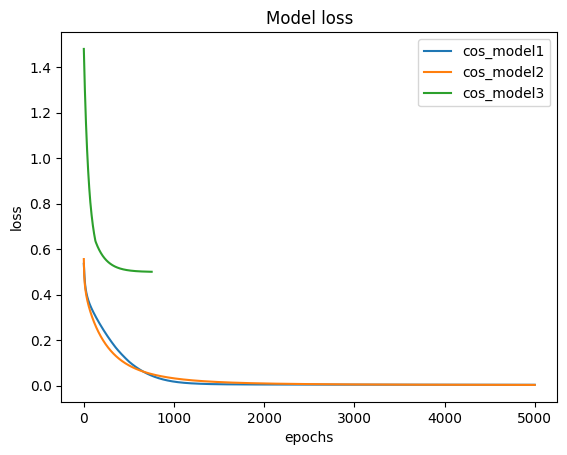

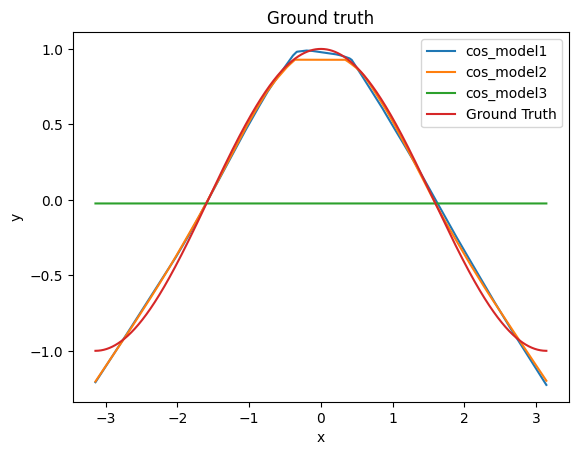

In [6]:
# Plotting model loss and ground truth for cosine neural networks
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['cos_model1','cos_model2','cos_model3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

with torch.no_grad():
    m1_y = cos_model1(x.unsqueeze(1)).cpu().numpy()
    m2_y = cos_model2(x.unsqueeze(1)).cpu().numpy()
    m3_y = cos_model3(x.unsqueeze(1)).cpu().numpy()
    x = x.cpu().numpy()
    y = y.cpu().numpy()

ax2.plot(x, m1_y, x, m2_y, x, m3_y, x, y)
ax2.set(xlabel='x',ylabel='y', title='Ground truth')
ax2.legend(labels=['cos_model1', 'cos_model2','cos_model3', 'Ground Truth'])


## 1-1. Training on actual task

In [7]:
from torchvision import datasets
from torchvision.transforms import ToTensor
training_ds = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_ds = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

### Creating models

In [8]:
class NMISTNetwork1(nn.Module):
        """First CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Flatten(1), 
            nn.Linear(18432, 128),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        
class NMISTNetwork2(nn.Module):
        """Second CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),
            nn.ReLU(),
            nn.Flatten(1), 
            nn.Linear(25600, 128),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        
class NMISTNetwork3(nn.Module):
        """Third CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),
            nn.Dropout(.25),
            nn.ReLU(),
            nn.Conv2d(64, 64, 5),
            nn.Flatten(1), 
            nn.Linear(16384, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        

nmist1, nmist2, nmist3 = NMISTNetwork1(), NMISTNetwork2(), NMISTNetwork3()
display_model_info('nmist1', nmist1)
display_model_info('nmist2', nmist2)
display_model_info('nmist3', nmist3)

NMISTNetwork1(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=18432, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist1. parameters: 2361546'

NMISTNetwork2(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=25600, out_features=128, bias=True)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist2. parameters: 3330314'

NMISTNetwork3(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): Dropout(p=0.25, inplace=False)
    (4): ReLU()
    (5): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=16384, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist3. parameters: 2253130'

### Utility functions

In [9]:
def nmist_train_loop(dataloader, model, loss_fn, optimize, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    num_batches = len(dataloader)
    train_loss, correct = 0,0
    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        optimize.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()

        loss.backward()
        optimize.step()
    
    train_loss /= num_batches
    correct /=size

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Accuracy: {(100*correct)}%, Avg loss: {train_loss}")

    return train_loss, correct
        
def nmist_val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            X = X.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

#    if epoch % 10 == 0:
#        display(f"Epoch {epoch}. Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss, correct

### Training and Testing Loop

In [10]:
lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()
accy1, accy2, accy3 = list(), list(), list()

loss_fn = torch.nn.CrossEntropyLoss()
epochs = 75
lr = 1.5e-2
batch_size=150

training_dl = DataLoader(training_ds, batch_size=batch_size)
test_dl = DataLoader(test_ds, batch_size=batch_size)

patience = 5
best_val_loss = float('inf')
epochs_without_improvement = 0

optimizer1 = torch.optim.SGD(nmist1.parameters(), lr=lr)
display("Training & eval: nmist1 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist1, loss_fn, optimizer1, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist1, loss_fn, epoch)

    if epoch%2 == 0:
        epochx1.append(epoch)
        lossy1.append(test_loss)
        accy1.append(correct)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 !=0:
            epochx1.append(epoch)
            lossy1.append(test_loss)
            accy1.append(correct)
        break
display("Done")

optimizer2 = torch.optim.SGD(nmist2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: nmist2 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist2, loss_fn, optimizer2, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist2, loss_fn, epoch)

    if epoch%2 == 0:
        epochx2.append(epoch)
        lossy2.append(test_loss)
        accy2.append(correct)

    if val_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx2.append(epoch)
            lossy2.append(test_loss)
            accy2.append(correct)
        break
display("Done")

optimizer3 = torch.optim.SGD(nmist3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: nmist3 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist3, loss_fn, optimizer3, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist3, loss_fn, epoch)

    if epoch%2 == 0:
        epochx3.append(epoch)
        lossy3.append(test_loss)
        accy3.append(correct)

    if val_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx3.append(epoch)
            lossy3.append(test_loss)
            accy3.append(correct)
        break
display("Done")

'Training & eval: nmist1 model'

'Epoch 0. Accuracy: 85.08%, Avg loss: 0.6150483938120306'

'Epoch 10. Accuracy: 96.76833333333333%, Avg loss: 0.11755251488648355'

'Epoch 20. Accuracy: 98.25333333333333%, Avg loss: 0.06384024545550346'

'Epoch 30. Accuracy: 98.76%, Avg loss: 0.045442405468784274'

'Epoch 40. Accuracy: 99.04333333333334%, Avg loss: 0.035187142903450874'

'Epoch 50. Accuracy: 99.25166666666667%, Avg loss: 0.028192957543651573'

'Convergence reached at 57'

'Done'

'Training & eval: nmist2 model'

'Epoch 0. Accuracy: 83.32666666666667%, Avg loss: 0.6260417319834233'

'Epoch 10. Accuracy: 98.31666666666666%, Avg loss: 0.05792879071785137'

'Epoch 20. Accuracy: 99.01833333333333%, Avg loss: 0.034988876007701036'

'Convergence reached at 23'

'Done'

'Training & eval: nmist3 model'

'Epoch 0. Accuracy: 79.36999999999999%, Avg loss: 0.6945269181951881'

'Epoch 10. Accuracy: 98.39166666666667%, Avg loss: 0.05232799299934413'

'Convergence reached at 14'

'Done'

### Save models

In [11]:
torch.save(nmist1.state_dict(), 'nmist1_weights.pth')
torch.save(nmist2.state_dict(), 'nmist2_weights.pth')
torch.save(nmist3.state_dict(), 'nmist3_weights.pth')

### Plotting Models

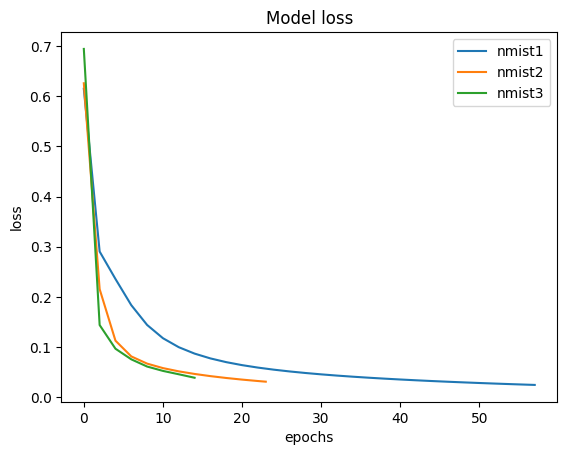

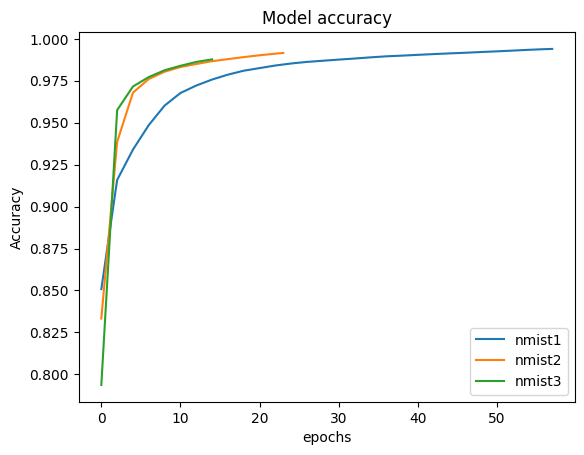

In [12]:
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['nmist1','nmist2','nmist3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

ax2.plot(epochx1, accy1, epochx2, accy2, epochx3, accy3)
ax2.set(xlabel='epochs',ylabel='Accuracy', title='Model accuracy')
ax2.legend(labels=['nmist1', 'nmist2','nmist3'])
